# Allstate Claims Severity
## How severe is an insurance claim?

### Description (from Competition URL: https://www.kaggle.com/competitions/allstate-claims-severity/overview):
When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.

Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. Aspiring competitors will demonstrate insight into better ways to predict claims severity for the chance to be part of Allstate’s efforts to ensure a worry-free customer experience.

New to Kaggle? This competition is a recruiting competition, your chance to get a foot in the door with the hiring team at Allstate.

### Evaluation
Submissions are evaluated on the mean absolute error (MAE) between the predicted loss and the actual loss.

### Submission File
For every id in the test set, you should predict the loss value. The file should contain a header and have the following format:
```
id,loss
4,0
6,1
9,99.3
etc.
```
### Citation
DanaFerguson, Meg Risdal, NoTrick, Sara R, Sillah, Tim Emmerling, and Will Cukierski. Allstate Claims Severity. https://kaggle.com/competitions/allstate-claims-severity, 2016. Kaggle.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
# train and test CSV files copied to main directory
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

We need to predict the loss value for the test data, so for model training divide the training data into training, test, and validation sets

In [3]:
counts_categorical = []
continous_features = []
categorical_features = []
for i in train_data.columns: # counting the number of categorical and continous features
    if 'cat' in i:
        #categorical_features_count += 1
        counts_categorical.append(len(train_data[i].value_counts()))  # counting the number of classes for each variable
        categorical_features.append(i)
    elif 'cont' in i:
        continous_features.append(i)
        #continous_features_count += 1

print(" In in data set we have {} categorical and {} continuous valued features".format(len(categorical_features),len(continous_features)))

 In in data set we have 116 categorical and 14 continuous valued features


In [4]:
print("In the training dataset, there are {} claim records. In the testing dataset, there are {} claim records".format(len(train_data),len(test_data)))

In the training dataset, there are 188318 claim records. In the testing dataset, there are 125546 claim records


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [6]:
print(train_data.shape)
train_data.drop_duplicates()
print(train_data.shape)

(188318, 132)
(188318, 132)


As we have the same train data after dropping duplicates as before, there are no duplicates in the train dataset.

In [7]:
train_data.isna().any().any()

np.False_

There are no missing values in the dataset.

In [8]:
train_data.describe()

id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

All of the continuous values are in the range (0, 1). However, the mean is non-zero and the standard deviation is also not equal to 1. Therefore, min-max scaling might have been used already to bring the data to the (0, 1) range limits. 

Text(0.5, 1.0, 'Distribution of Number of Categorical Features for Number of Classes')

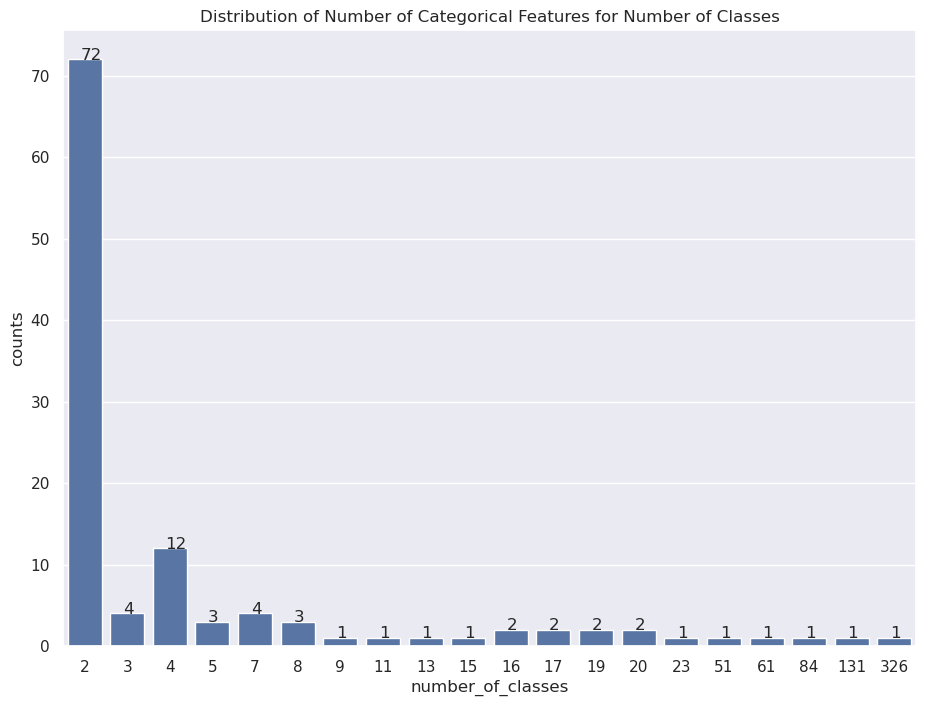

In [9]:
#ref : https://stackoverflow.com/a/59840744/5305748  for anotating bargraph
from collections import Counter
k = Counter(counts_categorical)
k = dict(k)
k = pd.DataFrame({'number_of_classes':list(k.keys()),'counts': list(k.values()) })
sns.set(rc={'figure.figsize':(11.0,8.0)})
g = sns.barplot(x= 'number_of_classes', y='counts',data=k)

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
        
plt.title("Distribution of Number of Categorical Features for Number of Classes")

There are 72 dual-class features and the majority of the features have less than eight classes per feature.

# Univariate Analysis

In [10]:
categorical_unvarivate = []
for i,x in enumerate(categorical_features):
    if counts_categorical[i] <3:
        categorical_unvarivate.append(x)


In [11]:
def piechart_categorical(categorical_features,x,y):
    """" Fucntion to plot the  pie chart of the categorical features"""
    sns.set(rc={'figure.figsize':(25.0,5.0)})
    k=0
    fig, axs = plt.subplots(1, 5)
    for i in categorical_features[x:y]:
        
        l = list(train_data[i].value_counts().index)
        axs[k].pie(train_data[i].value_counts(),labels=l, textprops={'fontsize': 16}, autopct='%1.1f%%')  # autopct is automatic percentage
        
        axs[k].set_title('for categorical feature -' + str(i),fontdict={'fontsize':16})
        k +=1 
    plt.show()

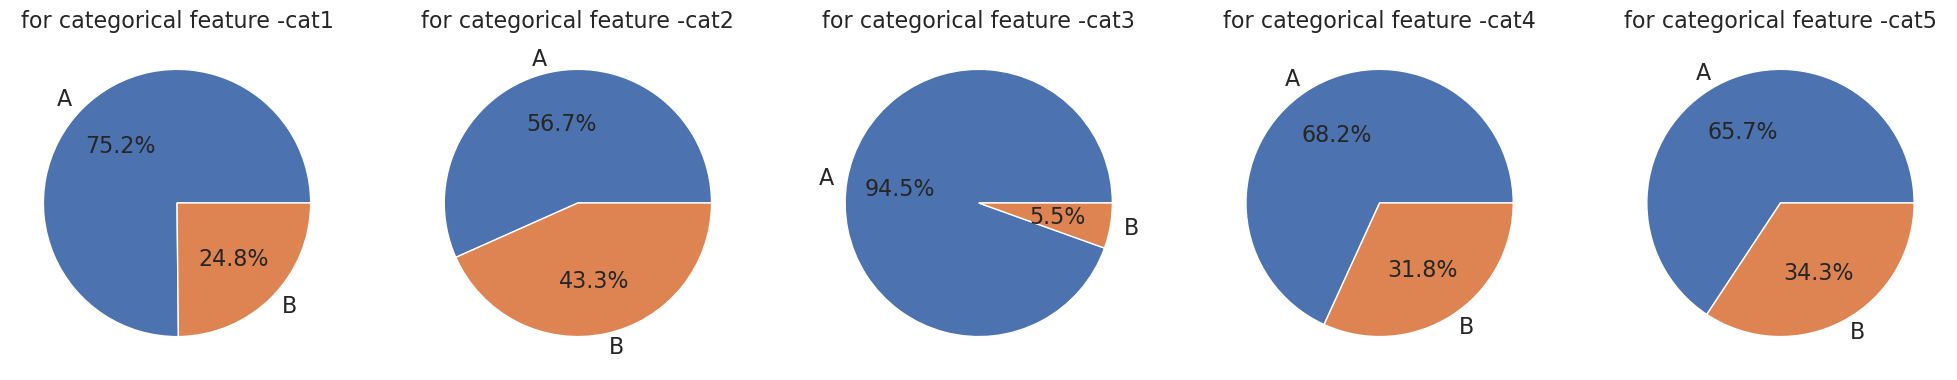

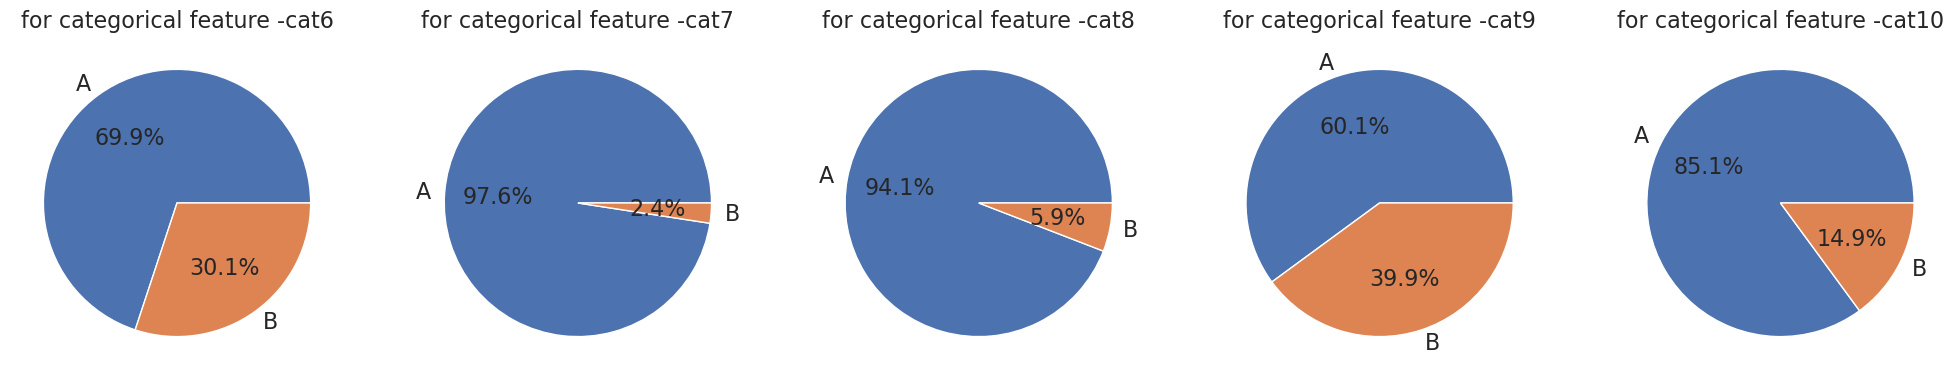

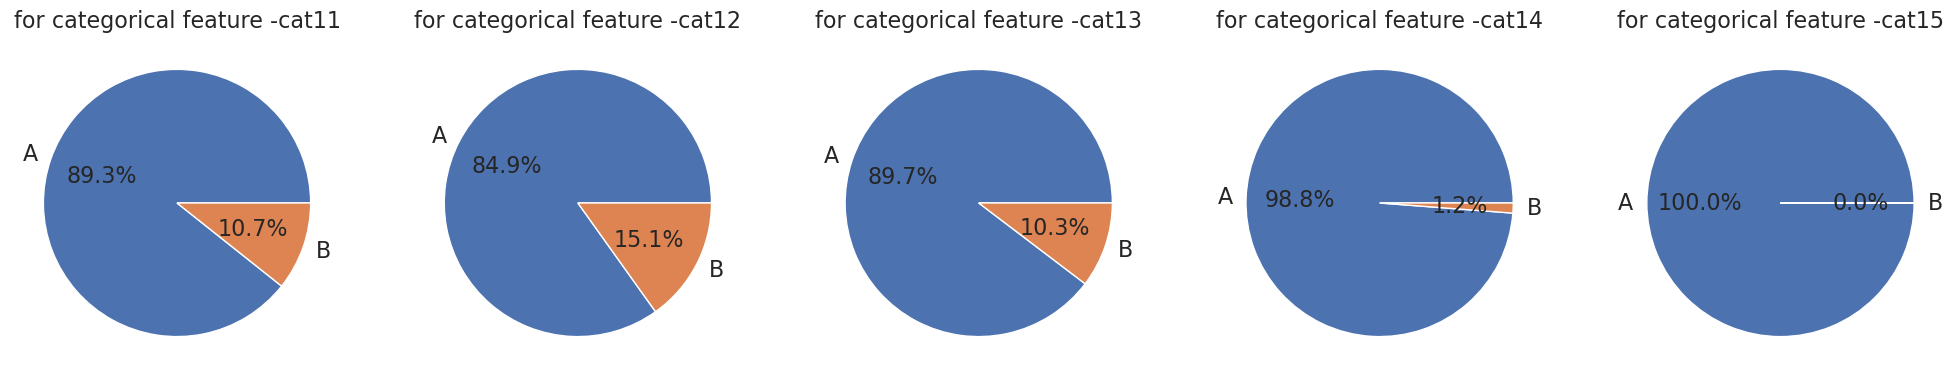

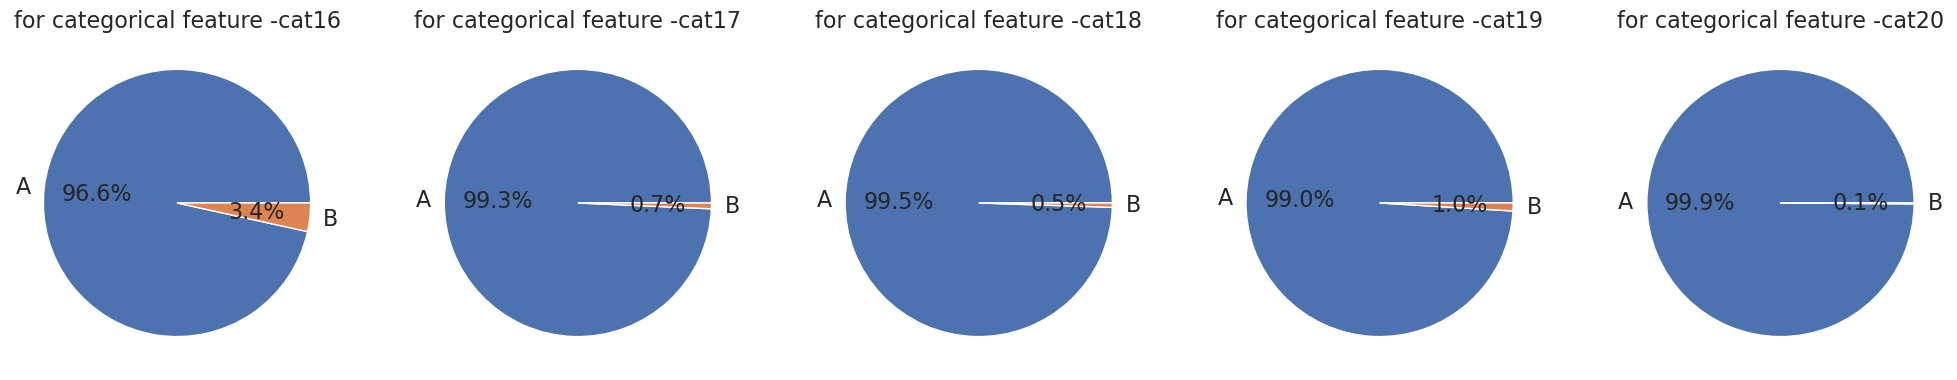

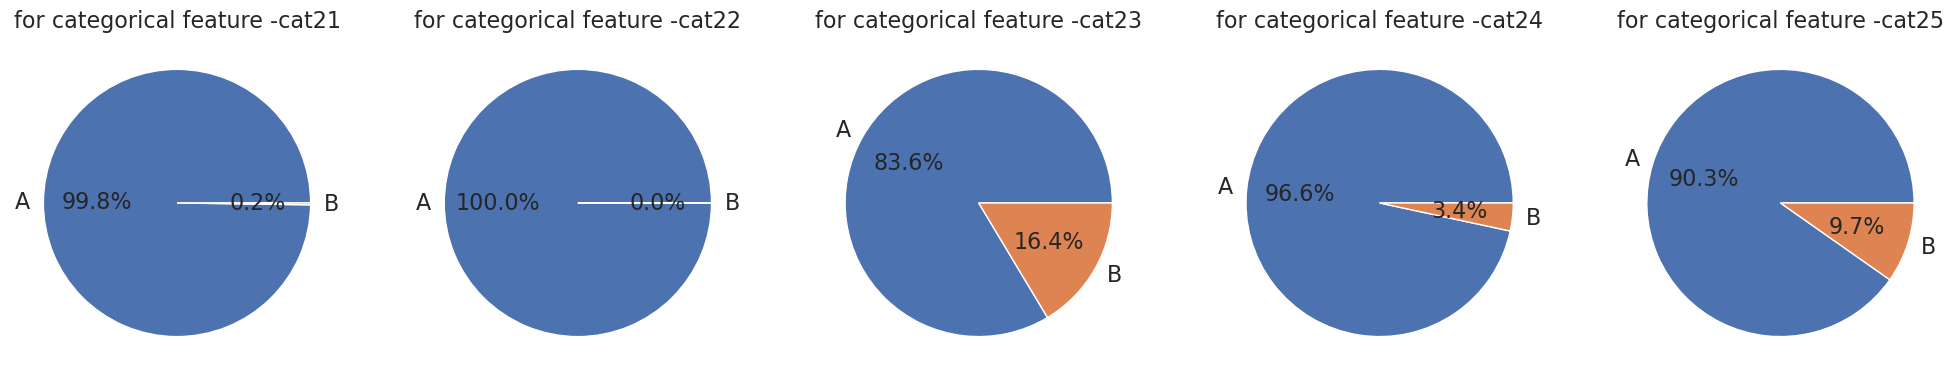

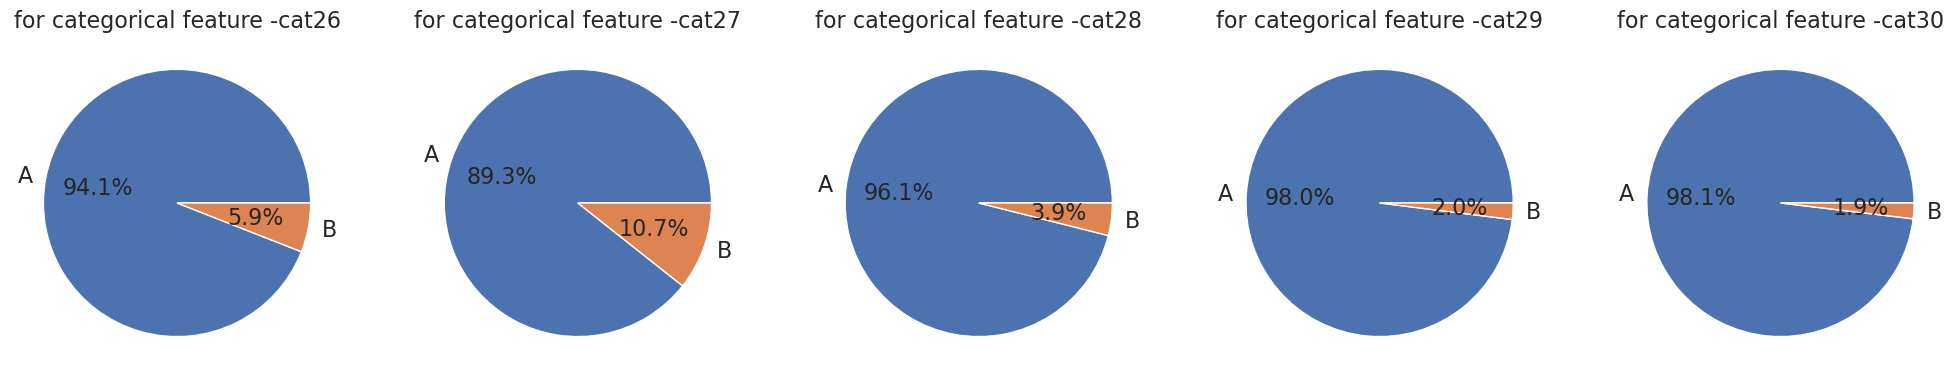

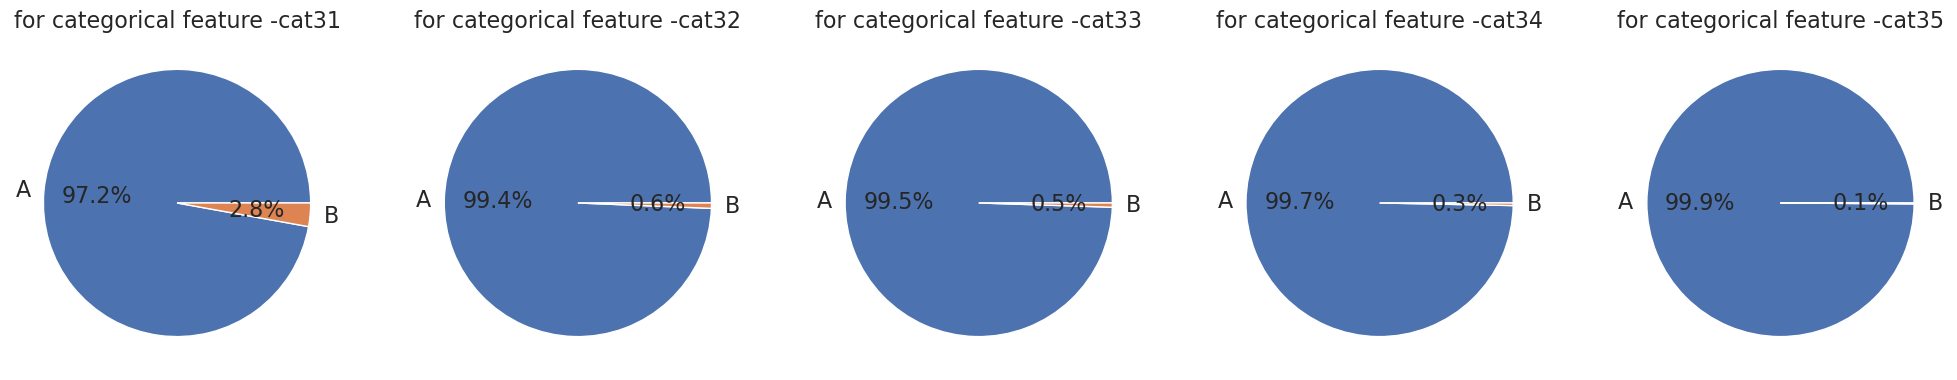

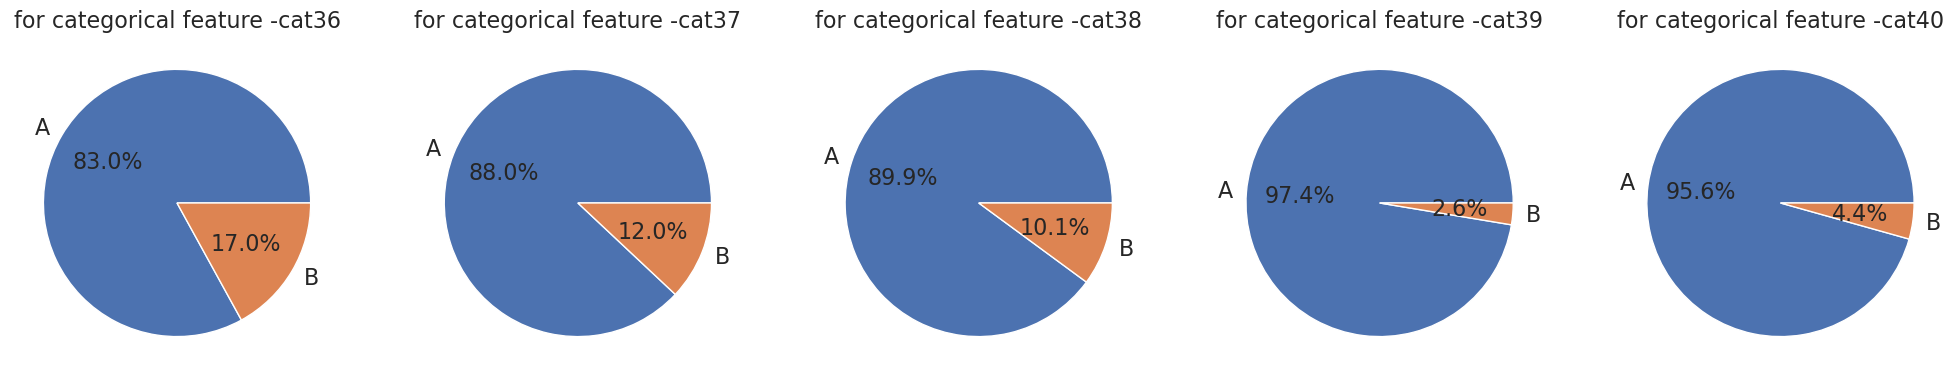

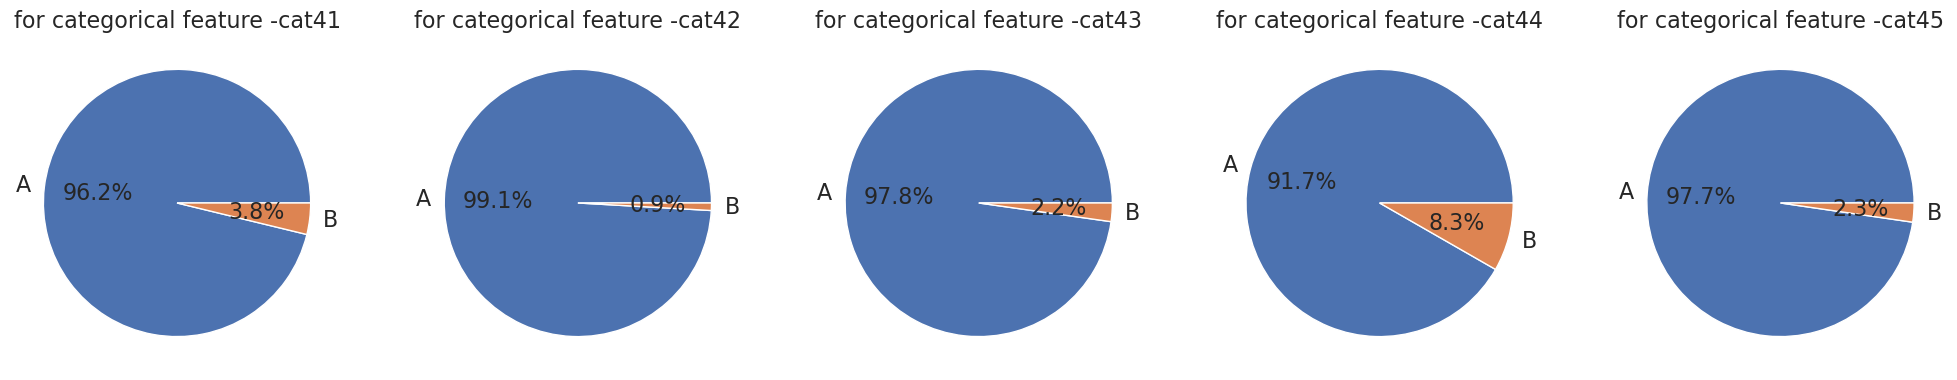

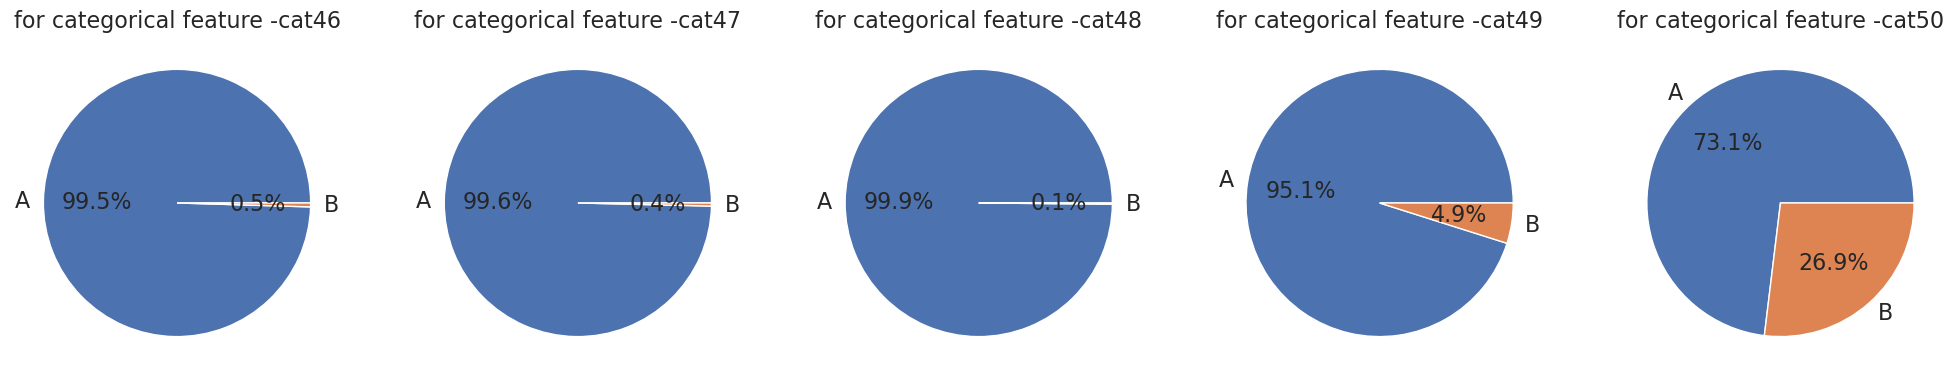

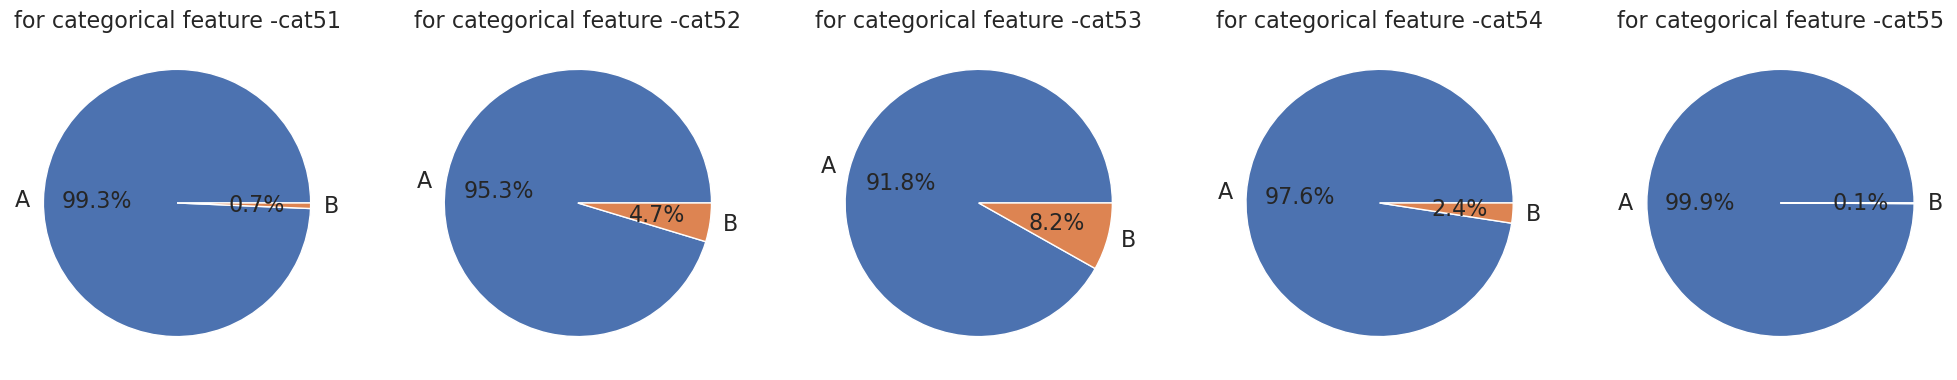

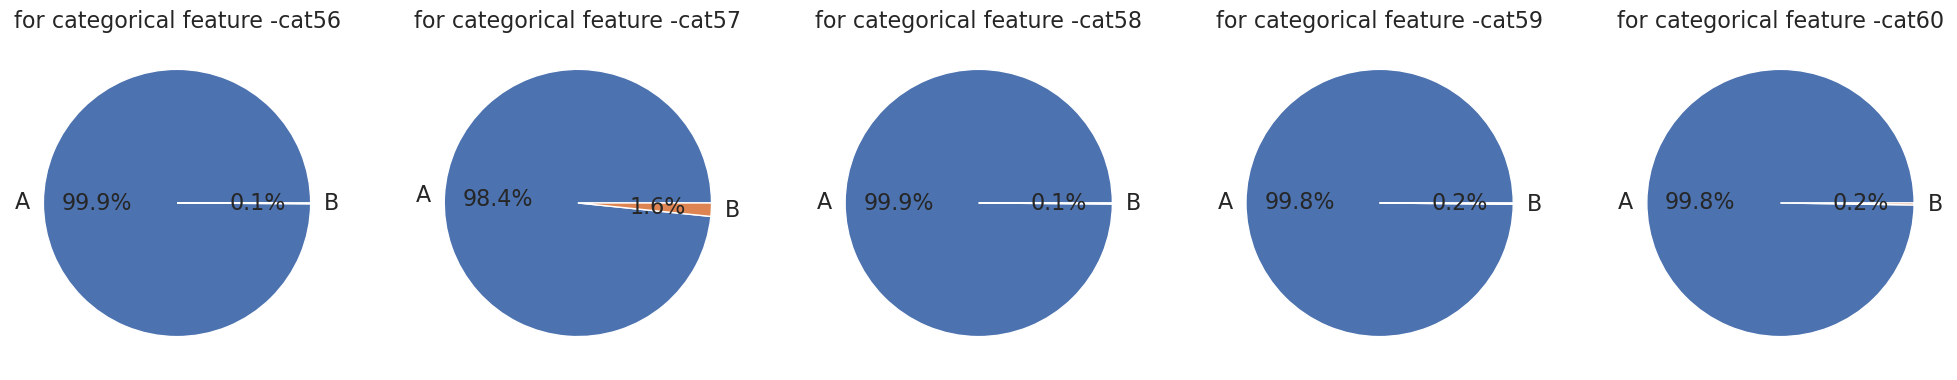

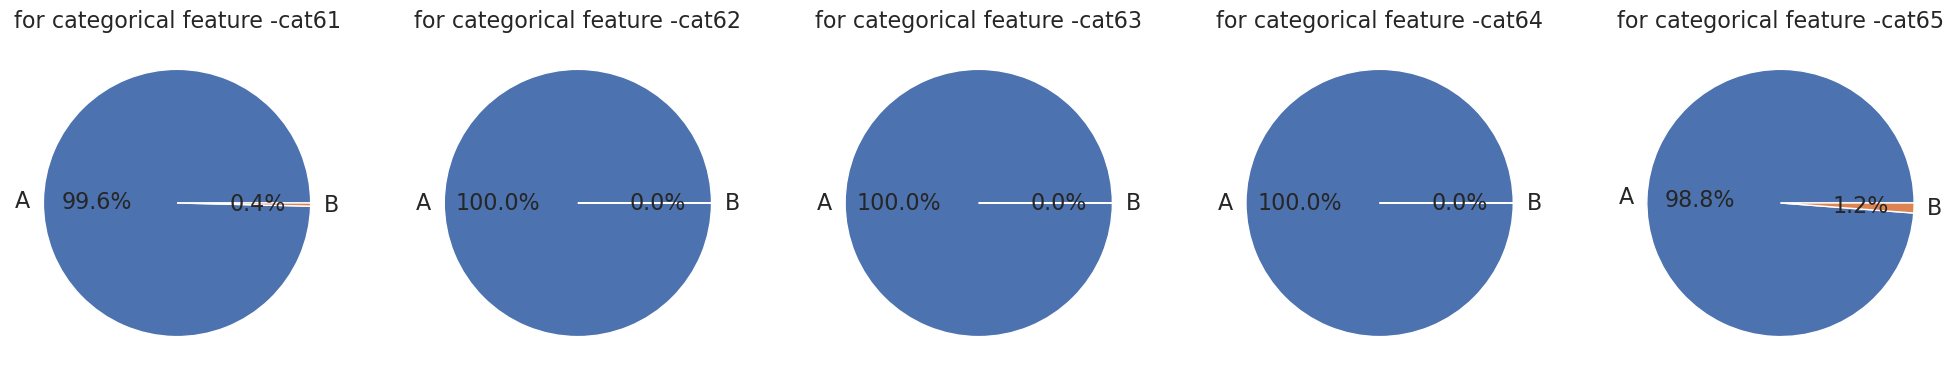

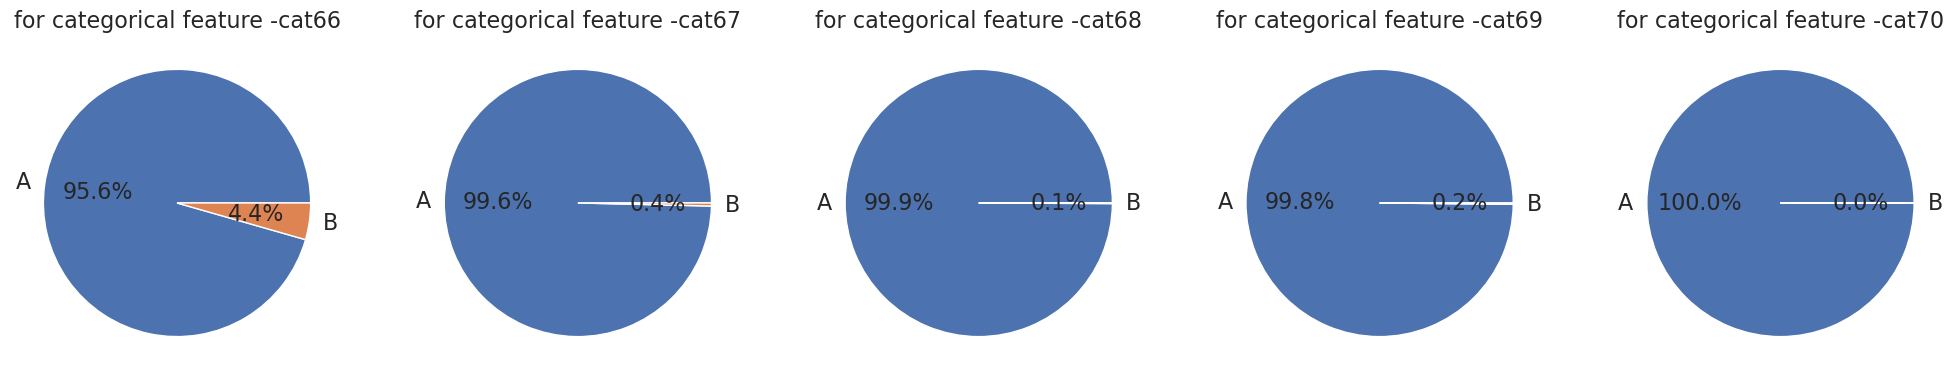

In [12]:
for i in range(int(len(categorical_unvarivate)/5)):
    piechart_categorical(categorical_unvarivate,i*5,(i+1)*5)

For most of the categorical classes, there is a single class that has more than half of the data points compared to the majority class. 

As the target loss variable is skewed, we do not remove any skewed features.


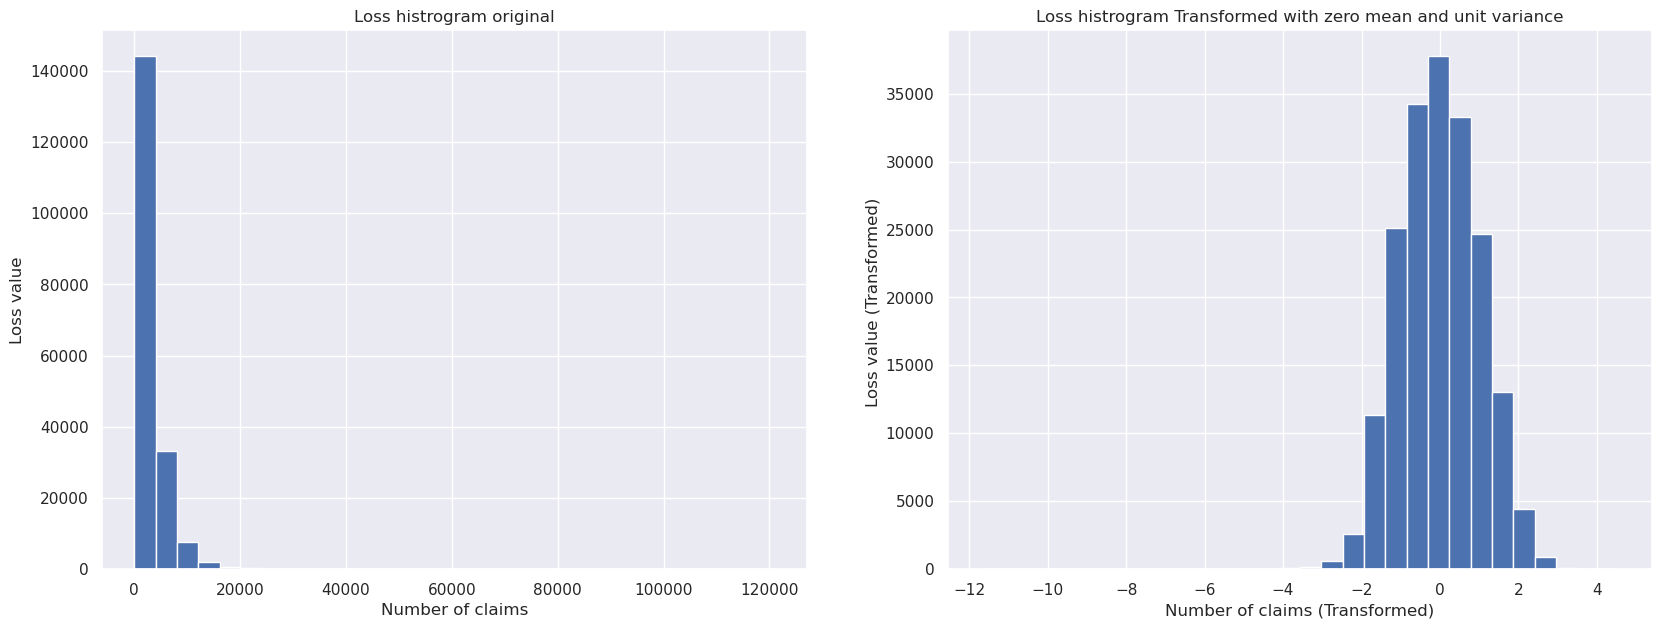

In [13]:
from sklearn.preprocessing import power_transform

transformed_loss = power_transform(train_data['loss'].values.reshape(-1,1), method='box-cox')
fig, axs = plt.subplots(1,2,figsize = (20,7) )

axs[0].hist(train_data['loss'].values.reshape(-1,1),bins=30)
axs[0].set_title("Loss histrogram original")
axs[0].set_xlabel("Number of claims")
axs[0].set_ylabel("Loss value")

axs[1].hist(transformed_loss,bins=30)
axs[1].set_title("Loss histrogram Transformed with zero mean and unit variance")
axs[1].set_xlabel("Number of claims (Transformed)")
axs[1].set_ylabel("Loss value (Transformed) ")

plt.show()

In [14]:
np.exp(np.percentile(transformed_loss,0))

np.float64(8.030043684457037e-06)

The loss feature has a power law distribution -> transform using Box-Cox Transformation

As there are many features, analyzing each individual feature is not appropriate.

In [15]:
X= pd.get_dummies(data= train_data[categorical_features])
y = train_data['loss']

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

select_K = SelectKBest(score_func= f_regression, k=15).fit(X, y)


In [17]:
select_K.get_support() # returns the boolean array wheather the feature is selected or not.

# ref : https://seaborn.pydata.org/tutorial/categorical.html
X.iloc[:1,select_K.get_support()].columns  # seeing which columns have the more feature importance 

Index(['cat7_A', 'cat7_B', 'cat10_A', 'cat10_B', 'cat12_A', 'cat12_B',
       'cat57_A', 'cat57_B', 'cat79_B', 'cat79_D', 'cat80_B', 'cat80_D',
       'cat81_D', 'cat87_B', 'cat89_A'],
      dtype='object')

features cat7,cat10,cat12,cat57,cat79,cat80,cat81,cat87,cat89  are important features(In no particular order).

Here all the features tunned out to be categorical features. (because only categorical features are inputed to the model.)

<Axes: xlabel='cat87', ylabel='loss'>

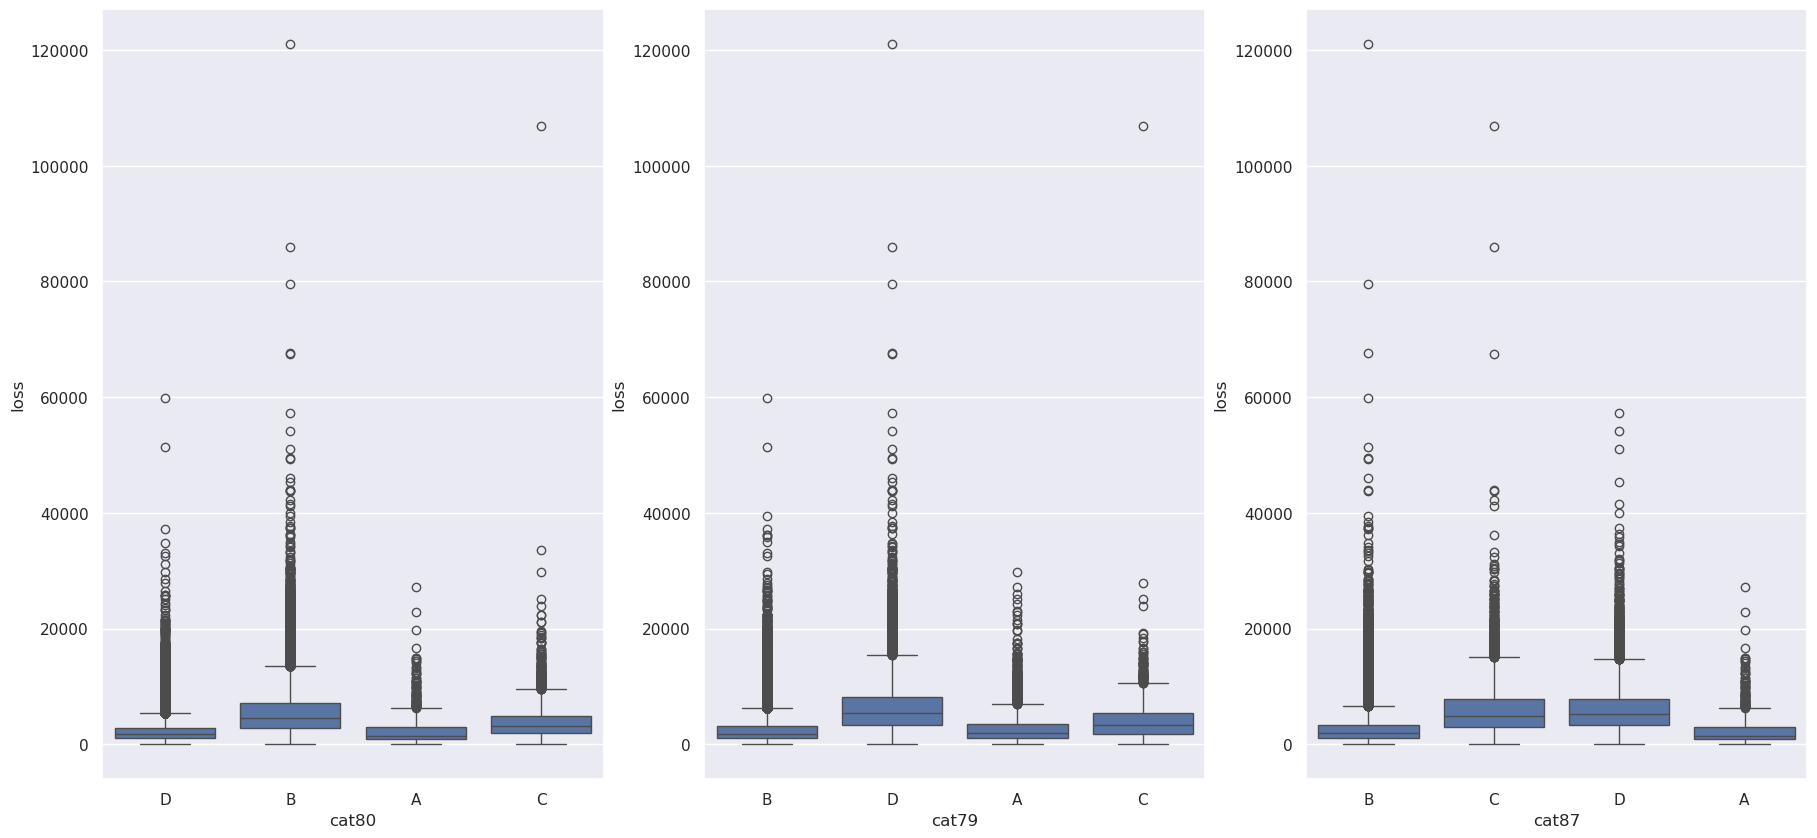

In [18]:
# ref : https://seaborn.pydata.org/tutorial/categorical.html

fig, axs = plt.subplots(1,3,figsize = (22,10) )

sns.boxplot(x="cat80", y="loss",data = train_data, ax= axs[0])  # ax argument does not works with catplot
sns.boxplot(x="cat79", y="loss",data = train_data,  ax= axs[1])
sns.boxplot(x="cat87", y="loss",data = train_data,  ax= axs[2])

For the cat80 , if a claim belongs to class A and C then loss value is not significantly higher.And class B have higher loss compared to the other classes.


For the cat79, again if claim belongs to class A and C then the loss outliers are much smaller than other class. Class D have higher loss then other classes.class B have less deviation around the median value.


For the cat87 ,Class A have the loss smaller then other classes.

<Axes: xlabel='cat57', ylabel='loss'>

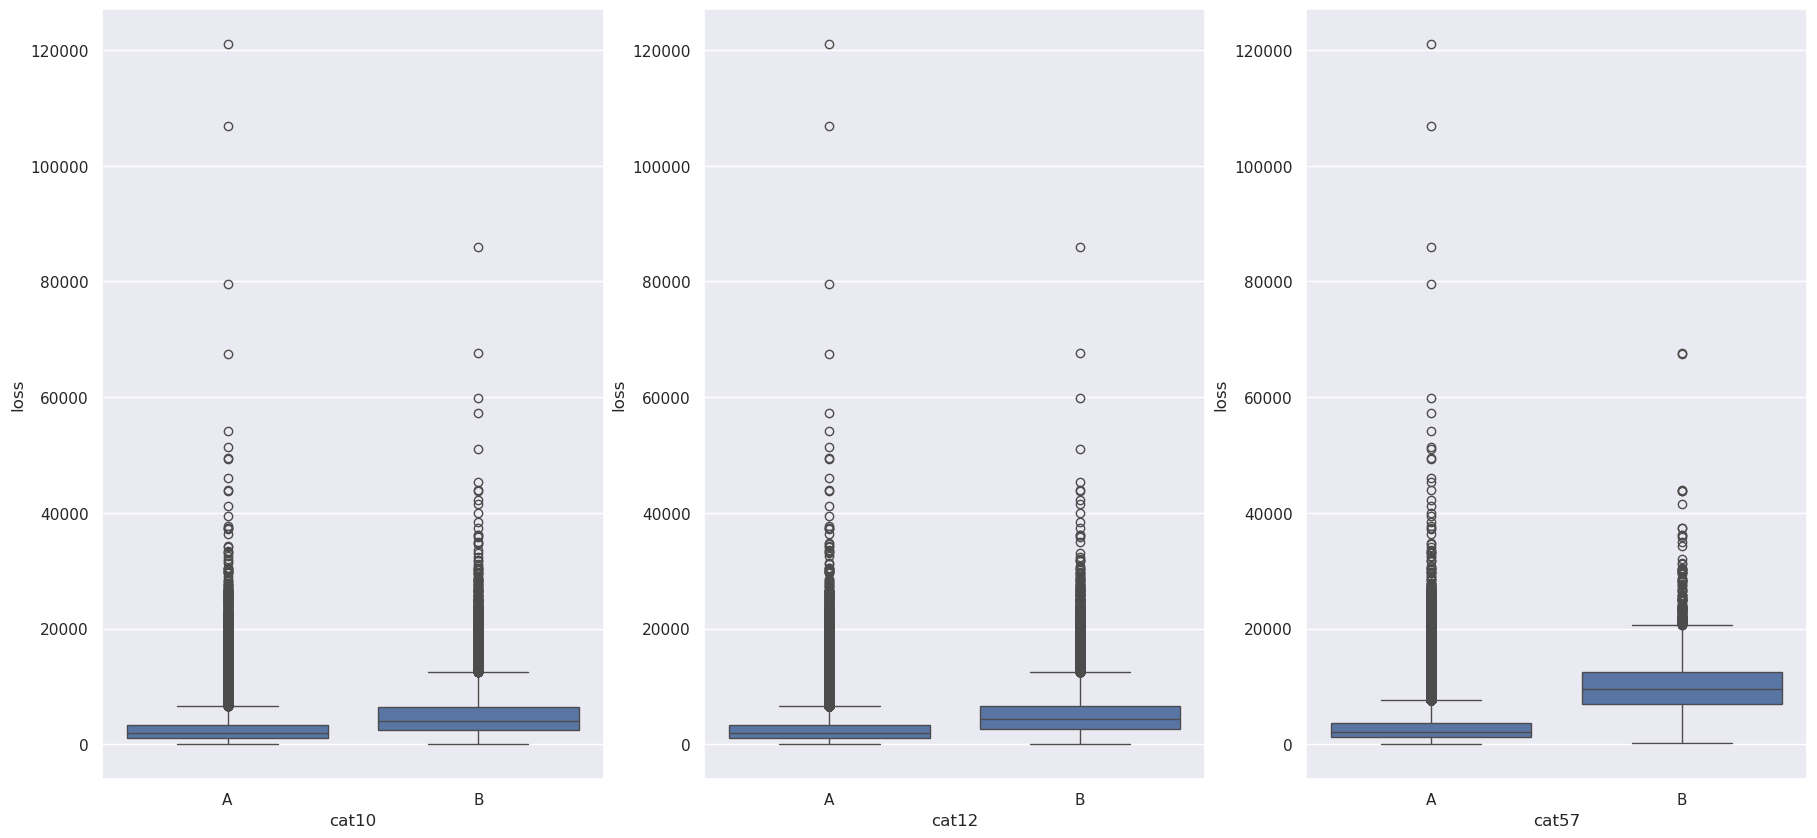

In [19]:
fig, axs = plt.subplots(1,3,figsize = (22,10) )

sns.boxplot(x="cat10", y="loss",data = train_data, ax= axs[0]) 
sns.boxplot(x="cat12", y="loss",data = train_data,  ax= axs[1])
sns.boxplot(x="cat57", y="loss",data = train_data,  ax= axs[2])


For cat10, class B has higher losses and greater variance around the median than class A.

For cat12, class B again shows higher losses and greater variance than class A.

For cat57, class A has much lower variance around the median, while class B incurs higher losses.

<Axes: xlabel='cat89', ylabel='loss'>

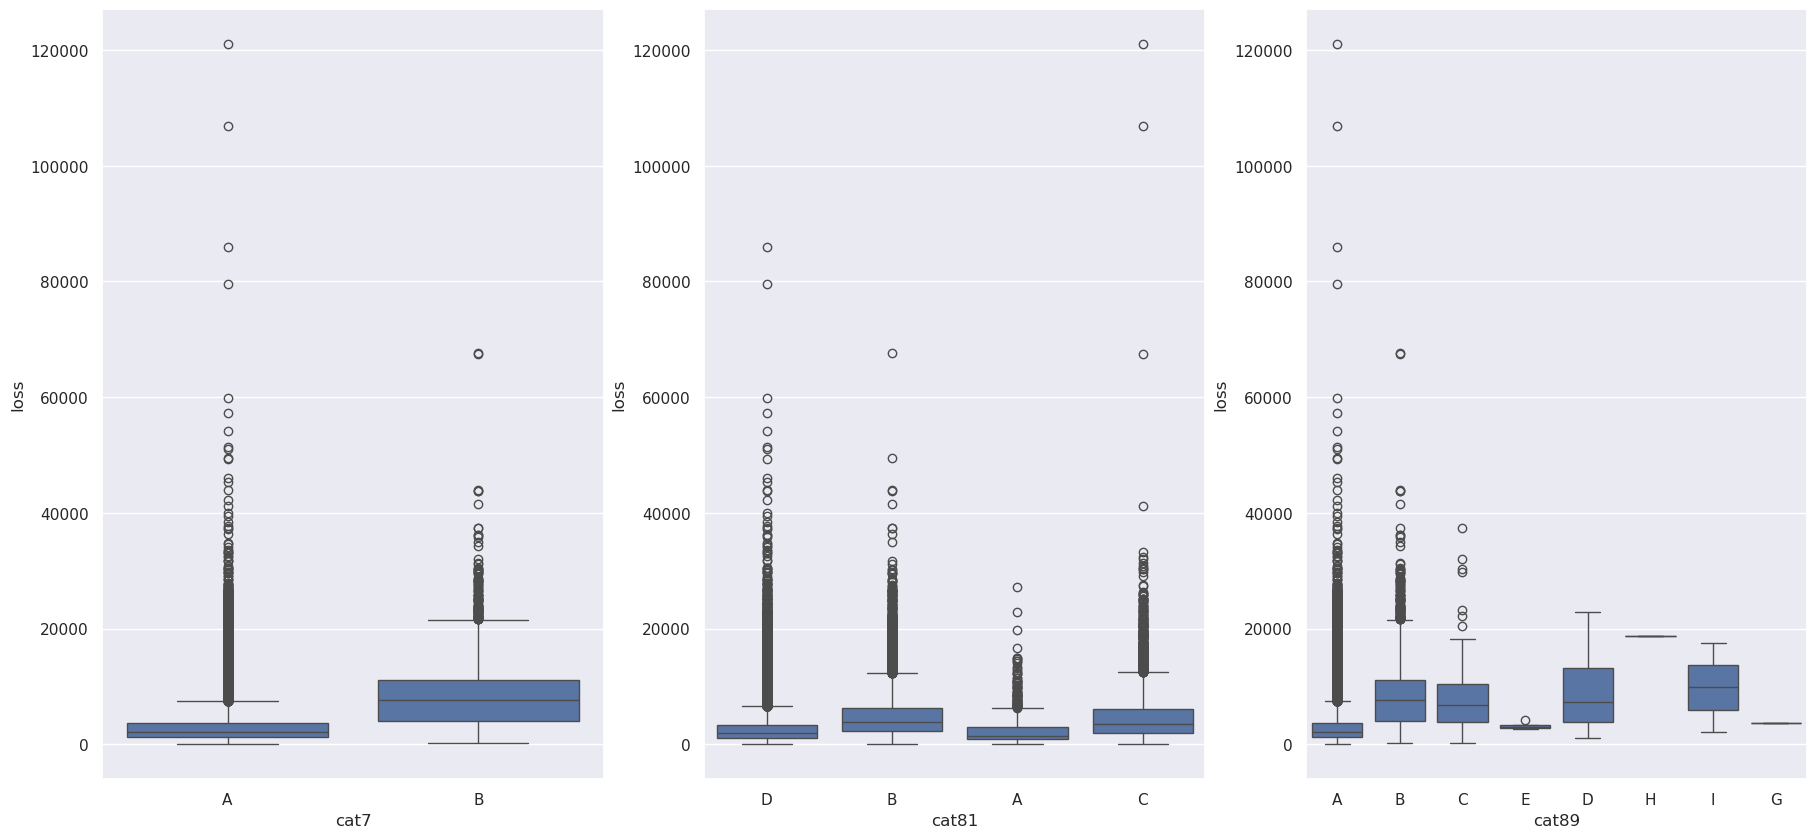

In [20]:
fig, axs = plt.subplots(1,3,figsize = (22,10) )

sns.boxplot(x="cat7", y="loss",data = train_data, ax= axs[0])  
sns.boxplot(x="cat81", y="loss",data = train_data,  ax= axs[1])
sns.boxplot(x="cat89", y="loss",data = train_data,  ax= axs[2])

For cat7, Class B have higher loss and more spread of losses then class A.

For cat81, Majority of the losses for the classes D and A are less in comparision to class B and C.


Or the cat89, the CLasses E and G have small losses without any outliers.
class H have significantly higher losses than other classes.

Almost all categorical features contain outliers, but they cannot be ignored or removed as they represent genuine customer claims.

Text(0.5, 1.0, 'Histogram for cont3 feature')

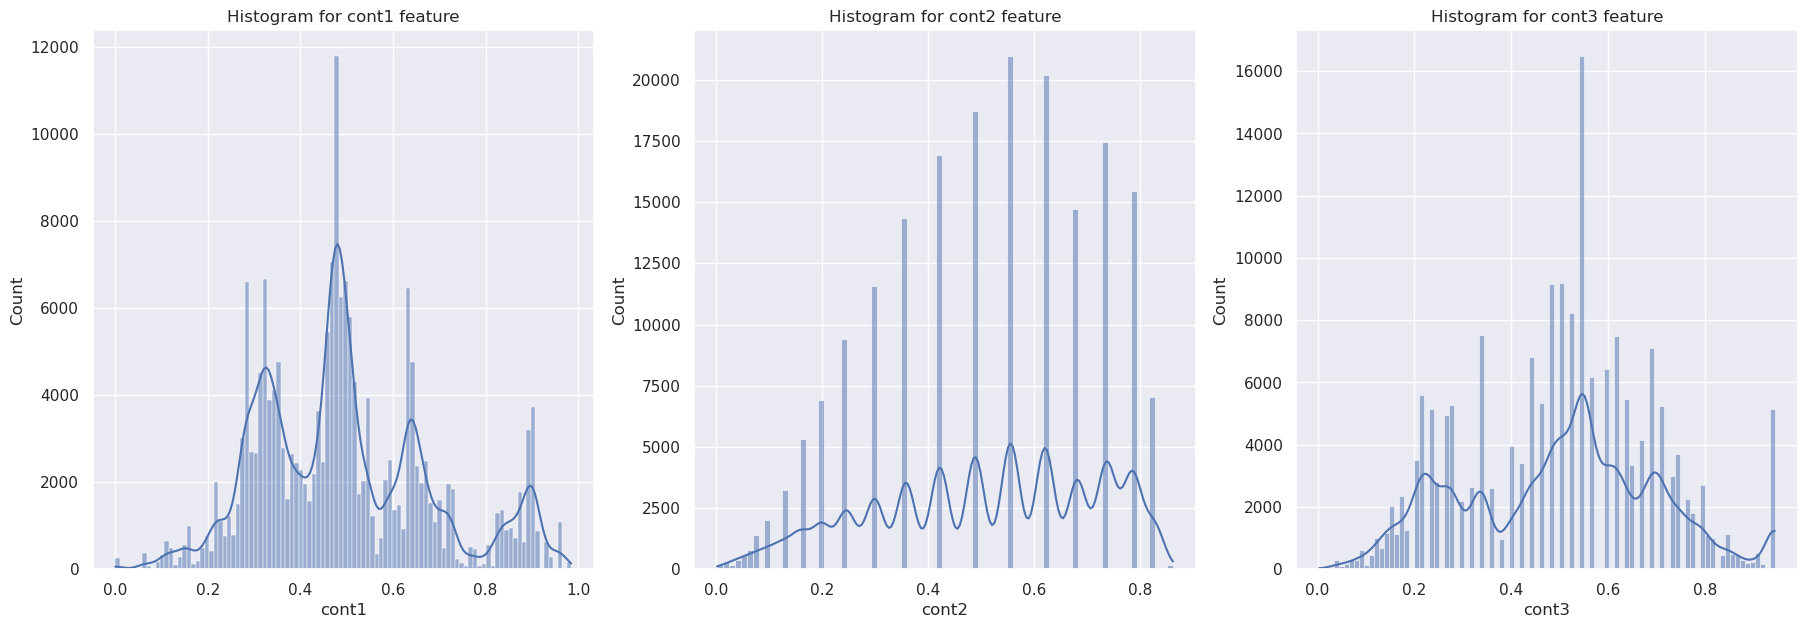

In [21]:
fig, axs = plt.subplots(1,3,figsize = (22,7) )

sns.histplot(x="cont1",data = train_data, ax= axs[0],kde=True)
axs[0].set_title("Histogram for cont1 feature")  
sns.histplot(x="cont2",data = train_data,  ax= axs[1],kde=True)
axs[1].set_title("Histogram for cont2 feature") 
sns.histplot(x="cont3",data = train_data,  ax= axs[2],kde=True)
axs[2].set_title("Histogram for cont3 feature") 

Text(0.5, 1.0, 'Histogram for cont6 feature')

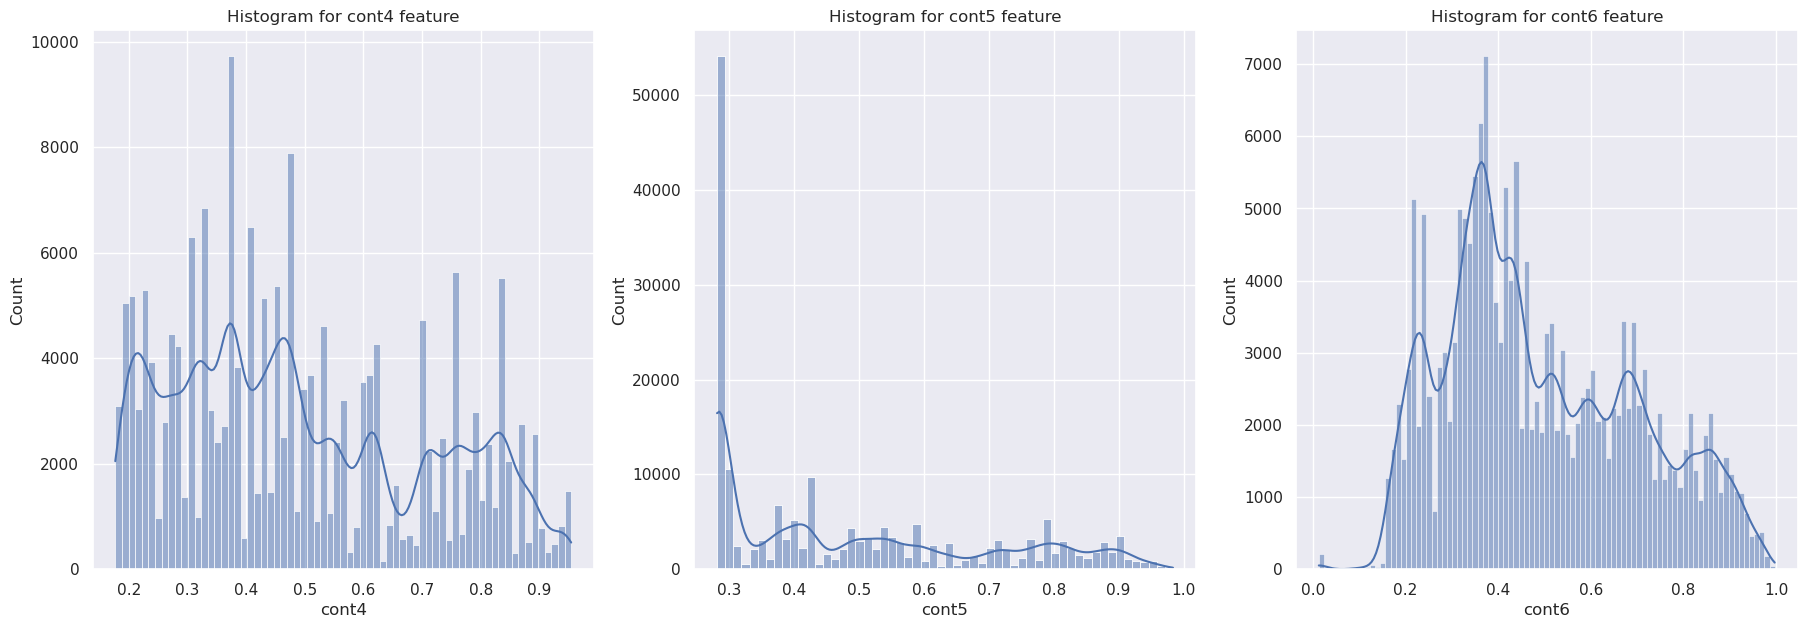

In [22]:
fig, axs = plt.subplots(1,3,figsize = (22,7) )

sns.histplot(x="cont4",data = train_data, ax= axs[0],kde=True)
axs[0].set_title("Histogram for cont4 feature")   
sns.histplot(x="cont5",data = train_data,  ax= axs[1],kde=True)
axs[1].set_title("Histogram for cont5 feature") 
sns.histplot(x="cont6",data = train_data,  ax= axs[2],kde=True)
axs[2].set_title("Histogram for cont6 feature") 

Text(0.5, 1.0, 'Histogram for cont9 feature')

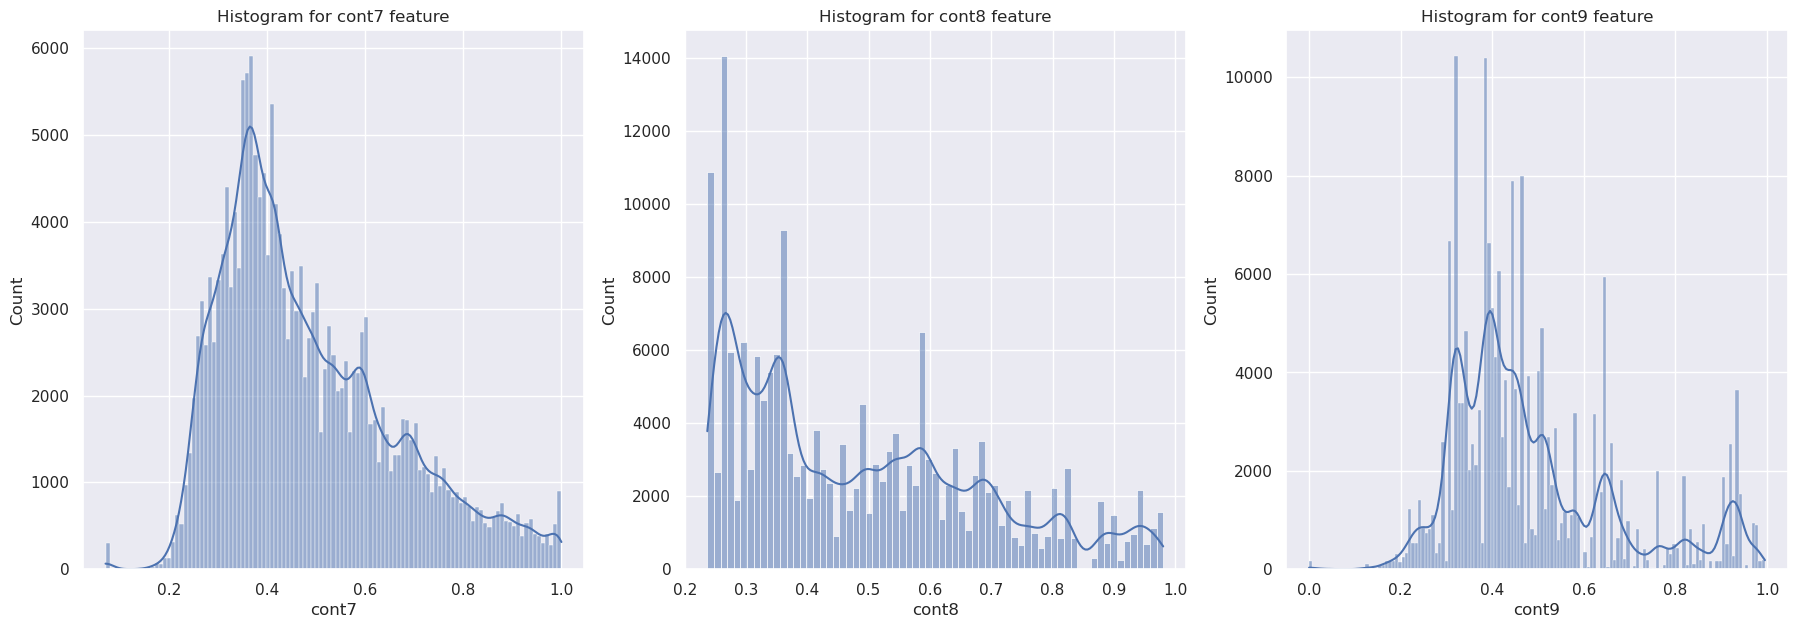

In [23]:
fig, axs = plt.subplots(1,3,figsize = (22,7) )

sns.histplot(x="cont7",data = train_data, ax= axs[0],kde=True) 
axs[0].set_title("Histogram for cont7 feature")  
sns.histplot(x="cont8",data = train_data,  ax= axs[1],kde=True)
axs[1].set_title("Histogram for cont8 feature") 
sns.histplot(x="cont9",data = train_data,  ax= axs[2],kde=True)
axs[2].set_title("Histogram for cont9 feature") 

Text(0.5, 1.0, 'Histogram for cont12 feature')

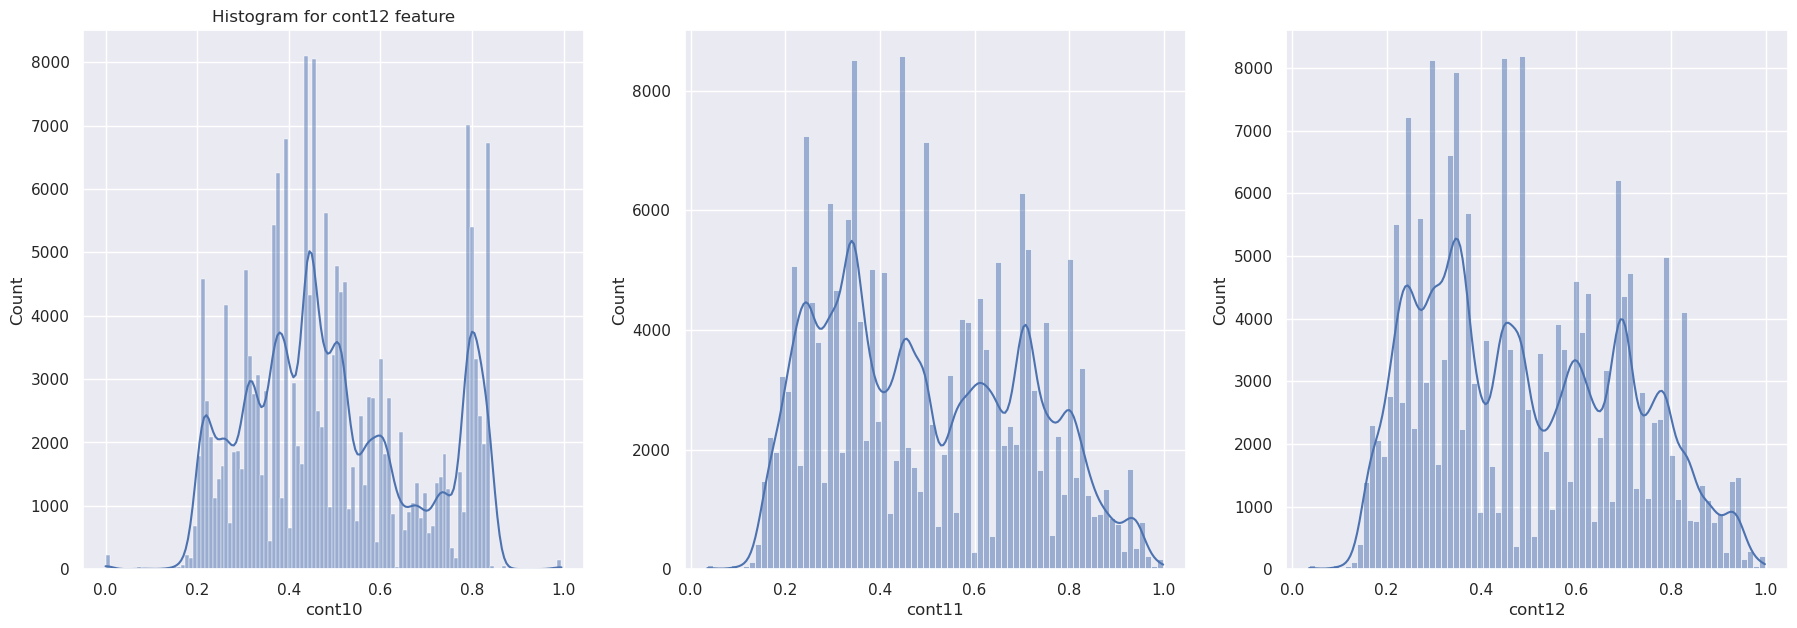

In [24]:
fig, axs = plt.subplots(1,3,figsize = (22,7) )

sns.histplot(x="cont10",data = train_data, ax= axs[0],kde=True)
axs[0].set_title("Histogram for cont10 feature")   
sns.histplot(x="cont11",data = train_data,  ax= axs[1],kde=True)
axs[0].set_title("Histogram for cont11 feature") 
sns.histplot(x="cont12",data = train_data,  ax= axs[2],kde=True)
axs[0].set_title("Histogram for cont12 feature") 

Text(0.5, 1.0, 'Histogram for cont14 feature')

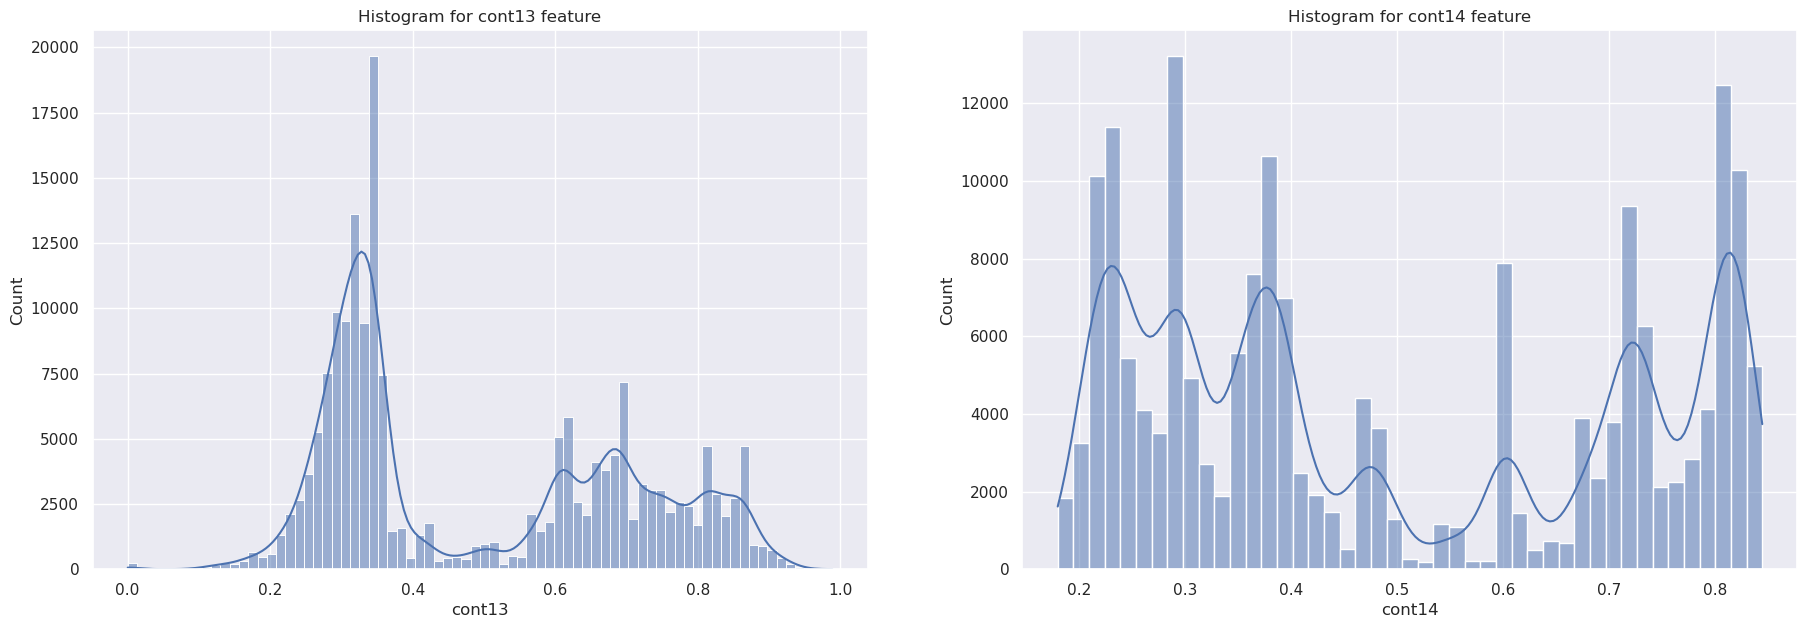

In [25]:
fig, axs = plt.subplots(1,2,figsize = (22,7) )

sns.histplot(x="cont13",data = train_data, ax= axs[0],kde=True)
axs[0].set_title("Histogram for cont13 feature")  
sns.histplot(x="cont14",data = train_data,  ax= axs[1],kde=True)
axs[1].set_title("Histogram for cont14 feature")

Except for features cont7 and cont6, none of the continuous features follow a normal distribution. Mean centering and variance scaling could be applied.

# Bi-Varriate Analysis

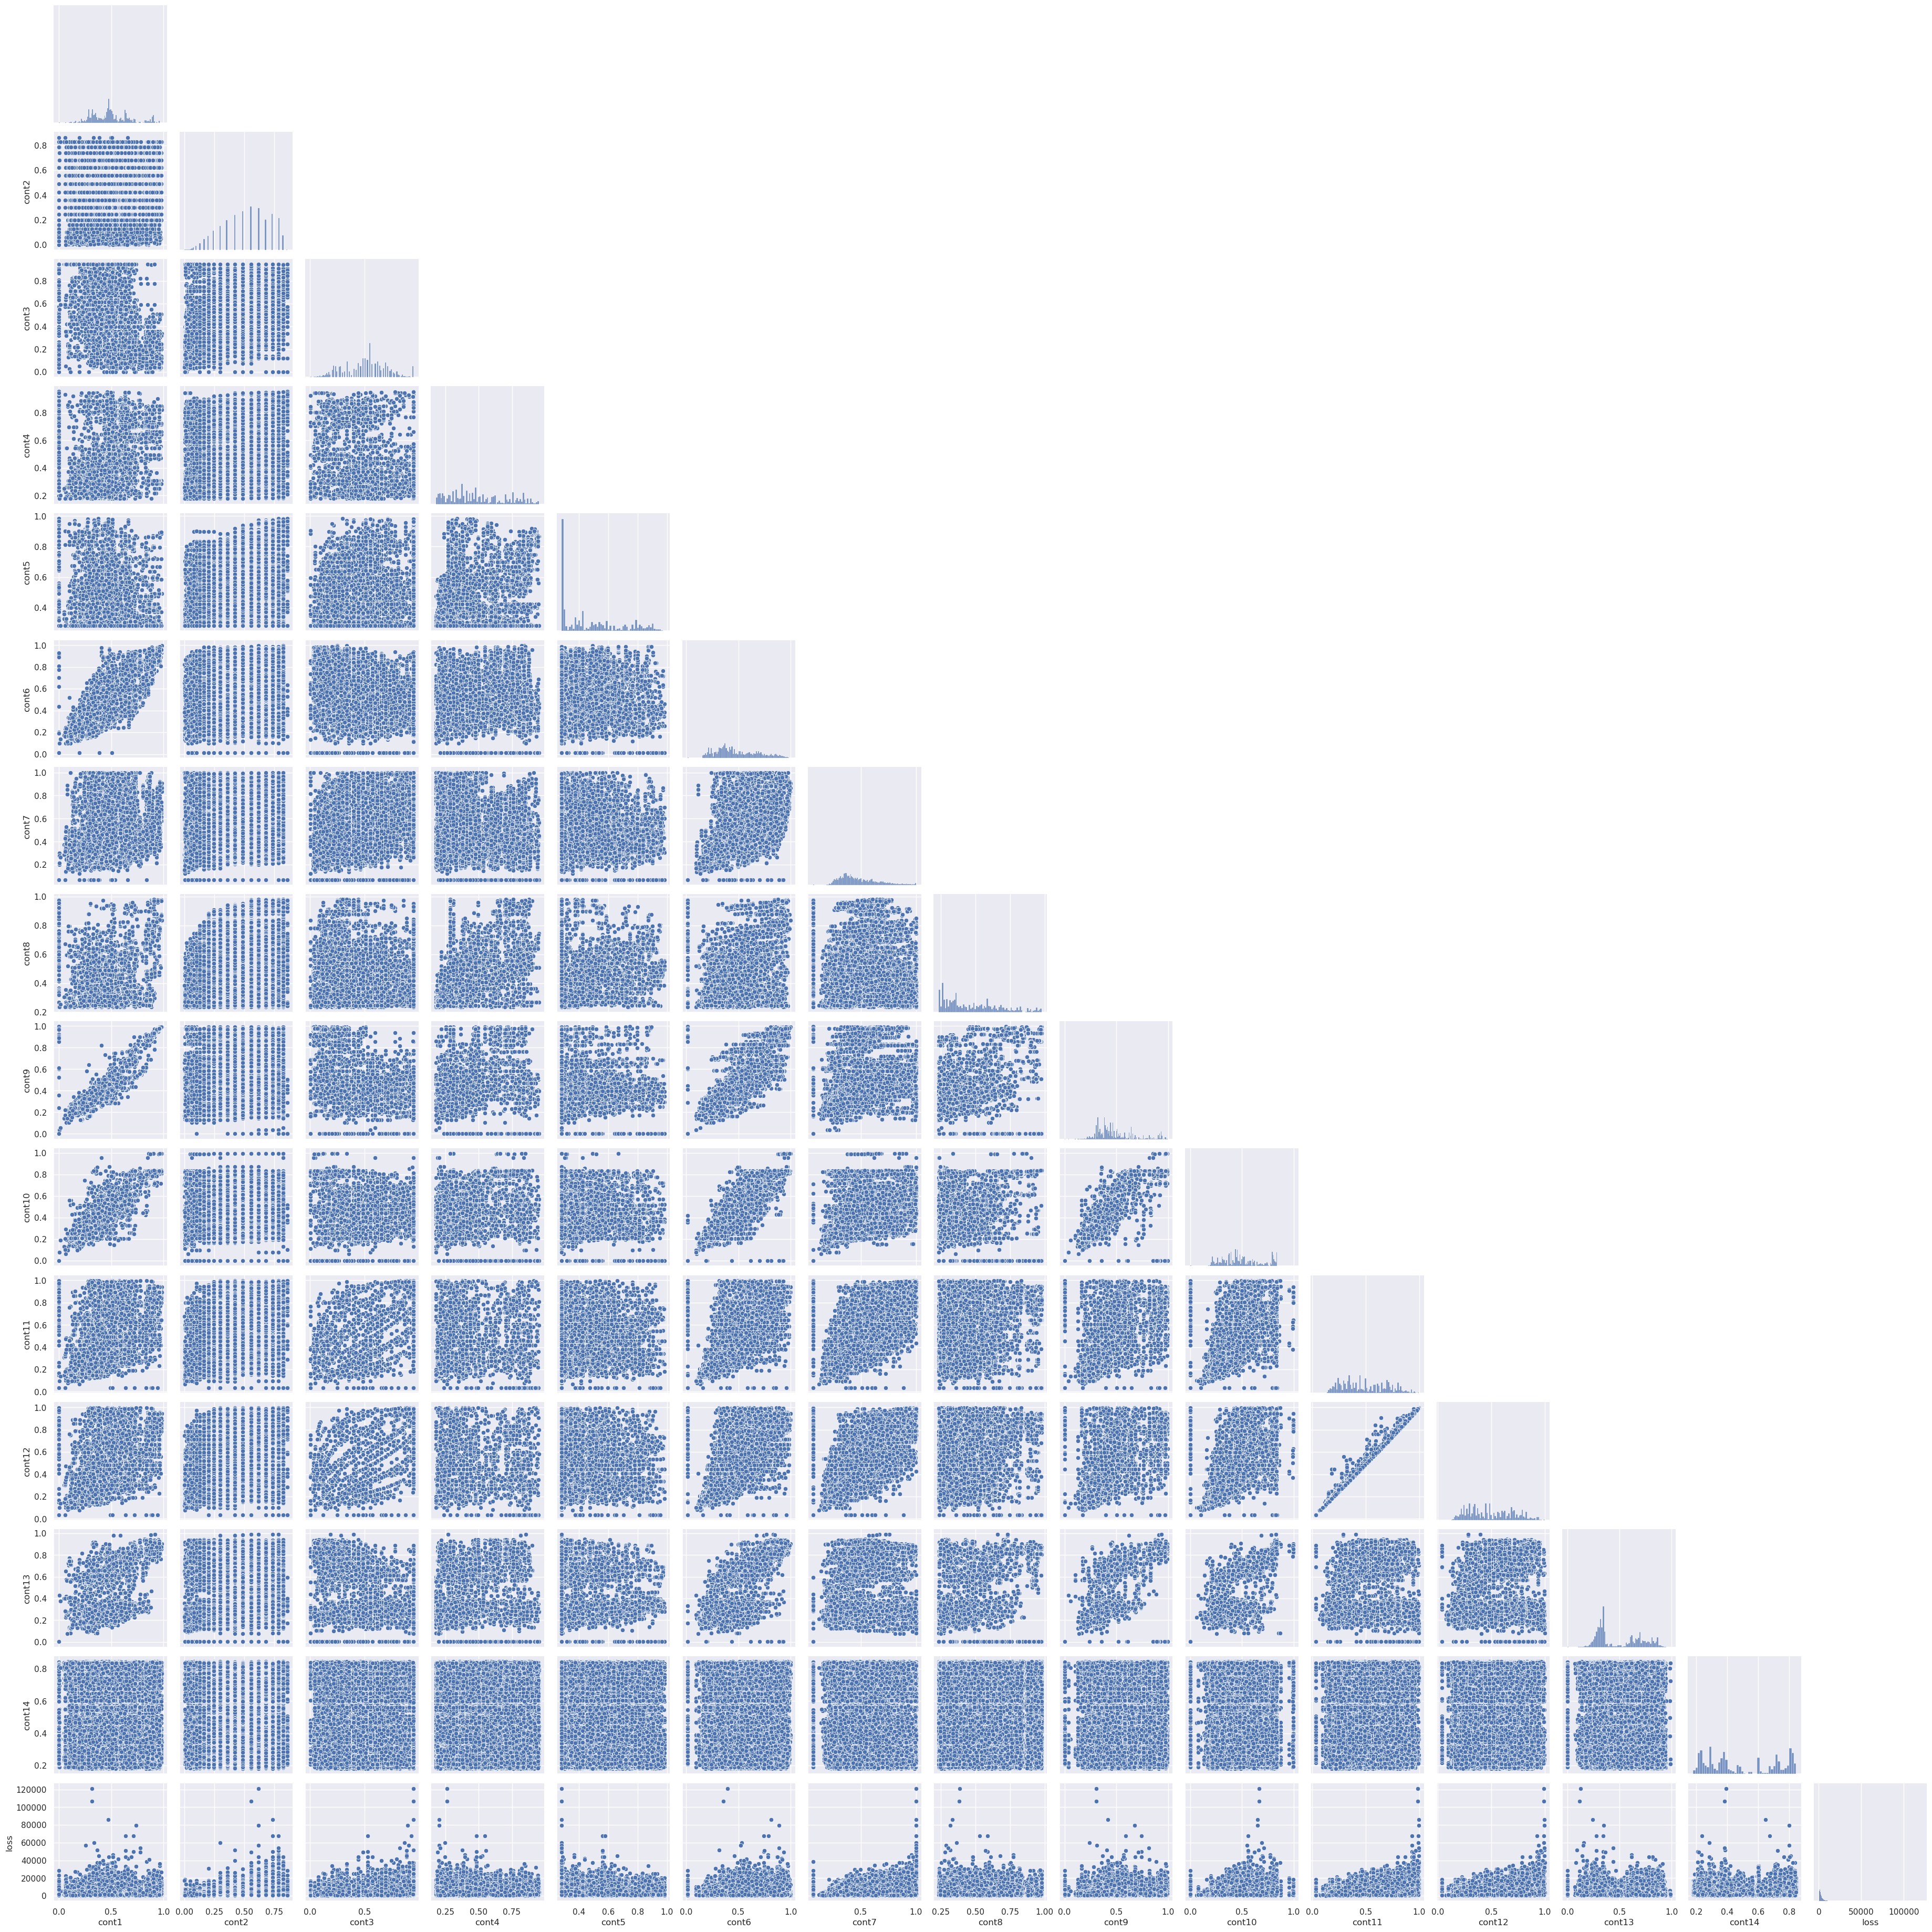

In [26]:
sns.set(rc={'figure.figsize':(15.0,15.0)})
sns.pairplot(train_data[continous_features + ['loss']],corner=True)

There is a linear relationship between cont1 and features cont6, cont9, and cont10. Additionally, cont11 and cont12 are highly correlated.

For all continuous features, the loss distribution is heavily concentrated at lower values, with only a few instances of higher losses.

<Axes: >

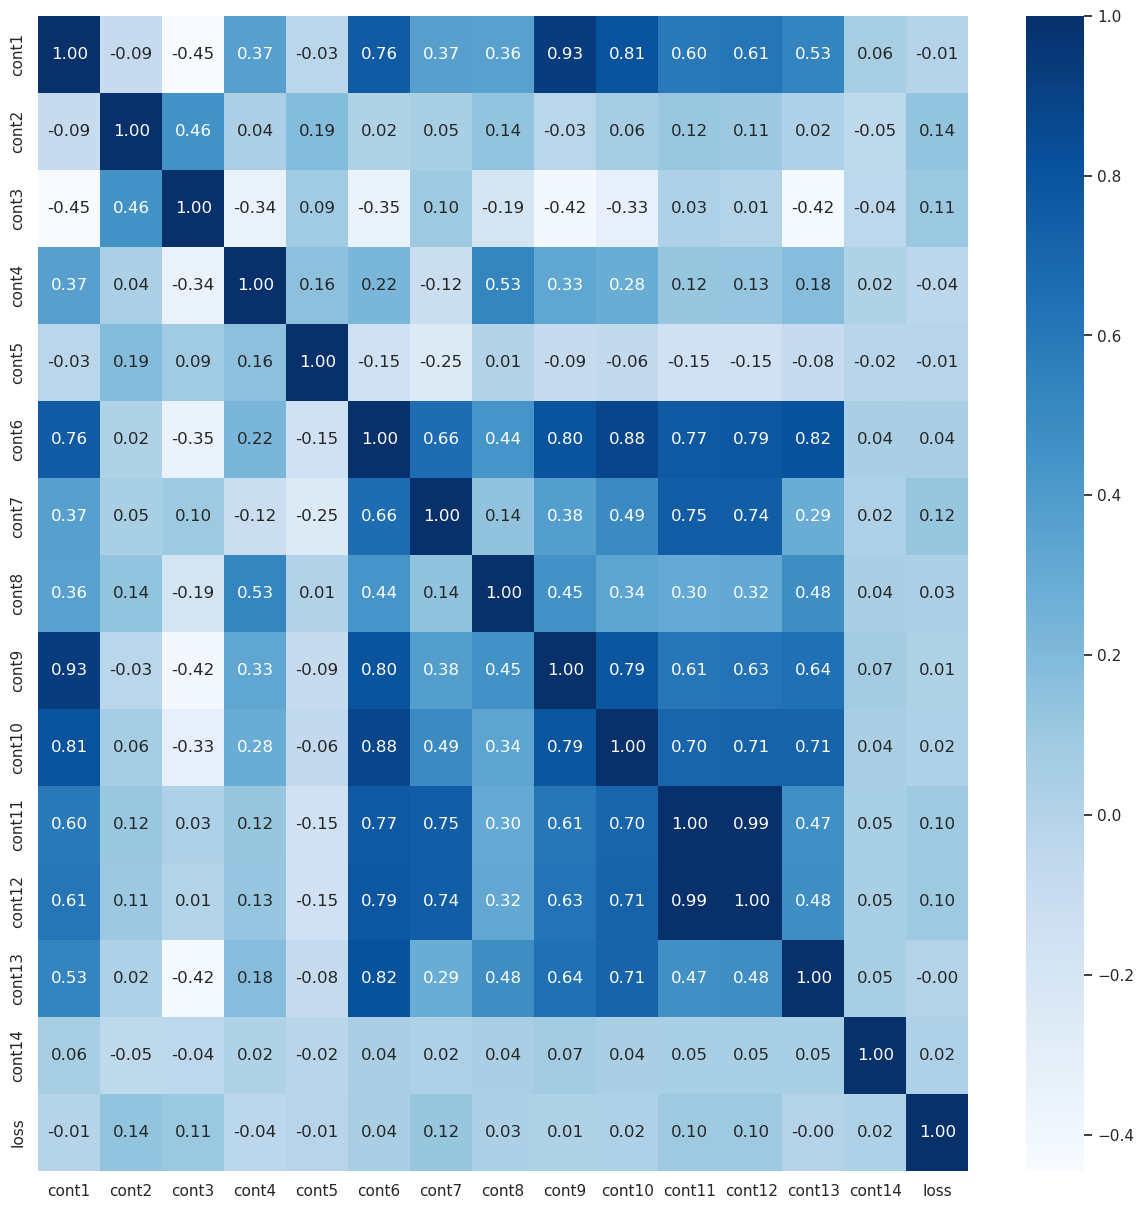

In [27]:
sns.heatmap(train_data[continous_features + ['loss']].corr(), annot=True, fmt='.2f',cmap= 'Blues', )

### Observation:  
There is a strong positive correlation between the following pairs of features:
- cont11 and cont12  
- cont1 and cont9  

Some feature pairs are negatively correlated:
- cont13 and cont3  
- cont9 and cont3  
- cont1 and cont3  

These weakly correlated features could be combined to explore potential improvements in cross-validation results.

# Spliting of Data

Since the test data does not include the target feature (loss value), the provided training data is split into training, testing, and cross-validation sets to evaluate model performance.

In [28]:
from sklearn.model_selection import train_test_split

y = train_data['loss']
X = train_data.drop(columns=['loss'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [29]:
SHIFT = 200
y_train = np.log(y_train) + SHIFT
y_test = np.log(y_test) + SHIFT

In [30]:
len(X_train),len(X_test)

(150654, 37664)

# Feature Engineering


In [31]:
# mean centering and unit variance.
def calculate_zscore(df,continous_features):

    # copying only the continous features from the dataframe
    df = df[continous_features].copy()
    for col in continous_features:
        df[col] = ( df[col] - df[col].mean())/df[col].std()
    return df

train_data['cont1']

0         0.726300
1         0.330514
2         0.261841
3         0.321594
4         0.273204
            ...   
188313    0.347403
188314    0.507661
188315    0.484469
188316    0.438385
188317    0.907272
Name: cont1, Length: 188318, dtype: float64

In [32]:
calculate_zscore(X_train,continous_features).describe()

cont1         cont2         cont3         cont4         cont5  \
count  1.506540e+05  1.506540e+05  1.506540e+05  1.506540e+05  1.506540e+05   
mean  -1.009307e-16  2.674192e-16 -3.813200e-16  1.049868e-16  6.584078e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.632625e+00 -2.440221e+00 -2.455072e+00 -1.488583e+00 -9.873161e-01   
25%   -7.863051e-01 -7.178986e-01 -8.013478e-01 -7.768642e-01 -9.873161e-01   
50%   -9.438184e-02  2.342946e-01  1.435527e-01 -1.829511e-01 -3.121871e-01   
75%    6.958876e-01  8.417824e-01  6.690233e-01  7.594194e-01  7.452815e-01   
max    2.622175e+00  1.714073e+00  2.202540e+00  2.189286e+00  2.373528e+00   

              cont6         cont7         cont8         cont9        cont10  \
count  1.506540e+05  1.506540e+05  1.506540e+05  1.506540e+05  1.506540e+05   
mean   3.362313e-16 -4.090995e-16 -1.450997e-16  5.861527e-16 -3.791976e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.329742e+00 -2.326462e+00 -1.250374e+00 -2.675300e+00 -2.680302e+00   
25%   -7.584671e-01 -7.548668e-01 -8.691421e-01 -6.957722e-01 -7.171764e-01   
50%   -2.423548e-01 -2.615034e-01 -2.546116e-01 -2.408378e-01 -1.969681e-01   
75%    7.971860e-01  5.938614e-01  6.914379e-01  4.050500e-01  6.290329e-01   
max    2.468696e+00  2.883765e+00  2.482203e+00  2.814581e+00  2.677289e+00   

             cont11        cont12        cont13        cont14  
count  1.506540e+05  1.506540e+05  1.506540e+05  1.506540e+05  
mean  -1.624796e-16  3.758961e-16 -8.277261e-17 -1.273189e-16  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -2.184723e+00 -2.181802e+00 -2.315972e+00 -1.420033e+00  
25%   -8.699063e-01 -8.817338e-01 -8.321319e-01 -9.035990e-01  
50%   -1.723248e-01 -1.466274e-01 -6.073949e-01 -3.965825e-01  
75%    8.852952e-01  8.730901e-01  9.276906e-01  1.029297e+00  
max    2.410843e+00  2.414683e+00  2.331538e+00  1.569779e+00

In [33]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoding(df,categorical_features):
    """ Fuction to return one hot encoder """
    df = df[categorical_features].copy()
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(df)
    return ohe

In [34]:
from sklearn.preprocessing import OrdinalEncoder
def label_categorical_encoding(df,categorical_features):
    """ Fuction to return the label_encode_dict containing the label encoder for each col in the categorical features """
    df = df[categorical_features].copy()
    label_encode_dict = dict()
    for col in df.columns:
        label_encode = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -3)
        label_encode.fit(df[col].values.reshape(-1,1))
        label_encode_dict[col] = label_encode

    return label_encode_dict

In [35]:
#one  hot encodeing of the categorical features
encoder_ohe = one_hot_encoding(X_train,categorical_features)
X_cat = encoder_ohe.transform(X_train[categorical_features])
X_cat_test = encoder_ohe.transform(X_test[categorical_features])

In [36]:
# Run if one hot encoded the data
X_cat = X_cat.toarray()
X_cat_test = X_cat_test.toarray()

In [37]:
#Label encodeing of the categorical features  OrdinalEncoder
X_cat = X_train[categorical_features]
X_cat_test = X_test[categorical_features] 

label_encode_dict = label_categorical_encoding(X_train,categorical_features)
for col,encoder in label_encode_dict.items():
    X_cat[col] = encoder.transform(X_train[col].values.reshape(-1,1))
    X_cat_test[col] = encoder.transform(X_test[col].values.reshape(-1,1))

In [38]:
# run if Label encoded the data
X_cat = X_cat.to_numpy()
X_cat_test = X_cat_test.to_numpy()

**Observation:**  
One-hot encoding performed poorly during model training.

In [39]:
def encode_continous(df,continous_features):
    for col in continous_features:
        df[col +'_log'] = np.log1p(df[col])  # Log transformed
        df[col + '_squareroot'] = np.sqrt(df[col])  # Square root
        df[col + '_square'] = np.square(df[col])  # Square
        df[col + '_log2'] = np.log2(df[col])  # log2

def encode_category(df,categorical_features):
    for col in categorical_features:
        unique_classes = sorted(df[col].unique())
        encoded_class = dict()

        for c in unique_classes:
            if len(c) == 2:
                encoded_class[c] = ord(c[0]) + ord(c[1]) - (2*65)  
                continue 
            encoded_class[c] = ord(c) - 65
        df[col].replace(encoded_class ,inplace = True)    

In [40]:
encode_continous(X_train,continous_features)
encode_continous(X_test,continous_features)
encode_category(X_train,categorical_features)
encode_category(X_test,categorical_features)

### Add Polynomial Feature Interactions

k = poly.fit_transform(X_train[continous_features])
k.shape

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # or another degree if desired
k = poly.fit_transform(X_train[continous_features])
print(k.shape)

(150654, 120)


In [42]:
k[:,1].shape

(150654,)

In [43]:
X_con = X_train[continous_features].to_numpy()
X_con_test = X_test[continous_features].to_numpy()
X_con.shape

(150654, 14)

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)   # There is no performace improment of having polynomial of degree 3
X_con = poly.fit_transform(X_con)
X_con_test = poly.transform(X_con_test)

In [45]:
X_con.shape, X_con_test.shape

((150654, 120), (37664, 120))

# Principal Components Analysis (PCA)


In [46]:
from sklearn.decomposition import PCA

X_pca = np.hstack((X_con,X_cat))  # did not work with the one sparse matrix
pca = PCA(n_components=20)
pca.fit(X_pca)

PCA(n_components=20)

In [47]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.17518087e+03 8.09841937e+02 3.60389962e+02 1.67791570e+02
 1.35594625e+02 2.54023649e+01 1.61457578e+01 1.17409538e+01
 7.65073580e+00 6.72595598e+00 5.57250765e+00 4.14344521e+00
 3.17621261e+00 2.37596418e+00 1.67597261e+00 1.62323554e+00
 1.37305030e+00 1.33573528e+00 9.65802025e-01 9.06139687e-01]
[7.66923584e-01 1.20012594e-01 5.34071308e-02 2.48654714e-02
 2.00941220e-02 3.76444287e-03 2.39268206e-03 1.73992264e-03
 1.13378254e-03 9.96737002e-04 8.25804478e-04 6.14027979e-04
 4.70691251e-04 3.52100344e-04 2.48366763e-04 2.40551518e-04
 2.03475914e-04 1.97946103e-04 1.43124727e-04 1.34283209e-04]


The top 2 principal components have explained variances above 2, while only the top 4 have variances greater than 1.

No principal component shows a significantly large explained variance. The highest, the first principal component, accounts for just 8.14% of the total variance across all 20 components.

## Auto Encoders

In [48]:
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# ref: https://www.tensorflow.org/tutorials/generative/autoencoder#first_example_basic_autoencoder
# ref: https://machinelearningmastery.com/autoencoder-for-classification/

2025-06-02 20:16:05.512823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748909765.529159     522 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748909765.536181     522 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-02 20:16:05.610061: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
latent_dim = 100   # latent_dim will be set based on the CV performance

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim*3, activation='relu'),
            layers.Dense(latent_dim*2, activation='relu'),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(236, activation='sigmoid') 
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [50]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

I0000 00:00:1748909768.785709     522 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [51]:
X_test = np.hstack((X_con_test,X_cat_test))
X_train = np.hstack((X_con,X_cat))

print (X_train.shape)
print (X_test.shape)

autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_test, X_test))

(150654, 236)
(37664, 236)
Epoch 1/10


I0000 00:00:1748909771.424680     645 service.cc:148] XLA service 0x7f5db4005020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748909771.424723     645 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-06-02 20:16:11.476882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748909771.608266     645 cuda_dnn.cc:529] Loaded cuDNN version 91001
2025-06-02 20:16:13.120688: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_157', 364 bytes spill stores, 364 bytes spill loads

2025-06-02 20:16:14.048652: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_164', 364 byte

  64/4708 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 154.2891

I0000 00:00:1748909775.682237     645 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4692/4708 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 152.5380

2025-06-02 20:16:29.934649: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_157', 416 bytes spill stores, 416 bytes spill loads

2025-06-02 20:16:30.978194: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_164', 364 bytes spill stores, 364 bytes spill loads

E0000 00:00:1748909791.151828     645 buffer_comparator.cc:157] Difference at 16: 0.364309, expected 97.8177
E0000 00:00:1748909791.151900     645 buffer_comparator.cc:157] Difference at 17: 0.529806, expected 106.253
E0000 00:00:1748909791.151908     645 buffer_comparator.cc:157] Difference at 18: 0.610802, expected 97.3044
E0000 00:00:1748909791.151911     645 buffer_comparator.cc:157] Difference at 19: 0.371645, expected 103.189
E0000 00:00:1748909791.151914     645 buffer_comparator.cc:157] Difference at 20: 0.385543, 

4708/4708 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - loss: 152.5378 - val_loss: 152.7936
Epoch 2/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 152.8227 - val_loss: 152.7891
Epoch 3/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 152.4234 - val_loss: 152.7887
Epoch 4/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 152.9895 - val_loss: 152.7885
Epoch 5/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 152.6918 - val_loss: 152.7885
Epoch 6/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 152.7746 - val_loss: 152.7883
Epoch 7/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 151.9479 - val_loss: 152.7884
Epoch 8/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 152.2982 - val_loss: 152.7883
Epoch 9/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 152.4001 - val_loss: 152.7894
Epoch 10/10
4708/4708 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 152.9555 - val_loss: 152.7887


from keras.utils.vis_utils import plot_model
autoencoder.encoder.summary()

encoder = autoencoder.encoder
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# Save Encoder to File
encoder.save('encoder_feature_compressed.h5')

In [52]:
from tensorflow.keras.utils import plot_model

autoencoder.encoder.summary()

encoder = autoencoder.encoder
plot_model(encoder, to_file='encoder_compress.png', show_shapes=True)

# Save the encoder model to file
encoder.save('encoder_feature_compressed.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 236)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │        71,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,400 (591.41 KB)

 Trainable params: 151,400 (591.41 KB)

 Non-trainable params: 0 (0.00 B)

The encoder model was saved to use its last layer as feature representations.

In [53]:
X_train_encode = encoder.predict(np.hstack((X_con,X_cat)))
X_test_encode = encoder.predict(np.hstack((X_con_test,X_cat_test)))

4708/4708 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


# Models

### Baseline Model for All Claims Records
This model will predict the median value for all inputs.

# Single Regression Models

In [54]:
from sklearn.metrics import mean_absolute_error

# New Encoded
X.replace([np.inf, -np.inf], -9, inplace=True)
X_test.replace([np.inf, -np.inf], -9, inplace=True)
X = X_train
y = y_train
X_test = X_test
y_test = y_test

In [55]:
if isinstance(X, pd.DataFrame):
    X.replace([np.inf, -np.inf], -9, inplace=True)
else:
    X = np.where(np.isinf(X), -9, X)

if isinstance(X_test, pd.DataFrame):
    X_test.replace([np.inf, -np.inf], -9, inplace=True)
else:
    X_test = np.where(np.isinf(X_test), -9, X_test)

X = X.drop(labels=['id'],axis=1)
X_test = X_test.drop(labels=['id'],axis=1)

In [56]:
# Loss shifted
median_train_loss = y_train.median()
median_train_loss = [median_train_loss] * len(y_test)
list_shift = [SHIFT] * len(y_test)
print('Mean Absolute Error on Test Data for Baseline Mode ' + str(mean_absolute_error( np.exp( np.array(median_train_loss) - np.array(list_shift)), np.exp(y_test - SHIFT ))))

Mean Absolute Error on Test Data for Baseline Mode 1796.9614807242938


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Linear regression

In [58]:
# Assuming you already have X_cat and X_con as NumPy arrays:
X = np.hstack((X_con, X_cat))  # Fully numeric features
y = y_train  # Already transformed with log + SHIFT

In [59]:
from sklearn.linear_model import Ridge  # L2 regularizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

parameter_grid = dict(alpha=[1000, 70.0, 60.0, 50.0, 10.0, 3.0, 2.0, 1.5, 1.0, 0.1, 0.01])
L2_regress = Ridge(random_state=0)

clf = RandomizedSearchCV(
    L2_regress,
    parameter_grid,
    random_state=0,
    n_jobs=-1,
    n_iter=10,
    cv=3,
    verbose=1,
    scoring='neg_mean_absolute_error'
)

search = clf.fit(X, y)
print("Best alpha:", search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best alpha: {'alpha': 1.0}


In [60]:
print('Mean absolute error on test data ' + str(mean_absolute_error( np.exp(search.best_estimator_.predict(X_test) - SHIFT ), np.exp(y_test - SHIFT ))))
print('Mean absolute error on Train data ' + str(mean_absolute_error( np.exp( search.best_estimator_.predict(X) - SHIFT ), np.exp(y - SHIFT ) )))

Mean absolute error on test data 1278.8199772938485
Mean absolute error on Train data 1279.869970765527


alpha = 0.01 gives the best MAE  of 1282.15 with Ridge as regularizer.

In [61]:
from sklearn import linear_model
from tqdm import tqdm
# L1 regularizer 
# Lasso is slower to run than Ridge

parameter_grid = dict(alpha= [1000,70.0,60.0,50.0,10.0,3.0,2.0,1.5,1.0,0.1,0.01] )

L1_regress = linear_model.Lasso(random_state = 0)

clf = RandomizedSearchCV(L1_regress, parameter_grid, random_state=0, n_jobs = -1,n_iter= 10,cv = 3,verbose = 1,scoring='neg_mean_absolute_error')
search = clf.fit(X, y)
search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'alpha': 0.01}

In [62]:
print('Mean absolute error on test data ' + str(mean_absolute_error( np.exp(search.best_estimator_.predict(X_test) - SHIFT ), np.exp(y_test - SHIFT ))))
print('Mean absolute error on Train data ' + str(mean_absolute_error( np.exp( search.best_estimator_.predict(X) - SHIFT ), np.exp(y - SHIFT ) )))

Mean absolute error on test data 1349.515199449083
Mean absolute error on Train data 1358.0543462257692


alpha = 0.01 gives the best MAE  of 1342.75 with Lasso as regularizer.




### Tree-Based Models

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

DTregressor = DecisionTreeRegressor(random_state=0)

parameter_grid = dict(max_depth= [2,5,7,10] , min_samples_split=[2,4,6], 
                     min_samples_leaf = [2,10,20,30],max_features= ['sqrt','log2',30,50,80])

clf = RandomizedSearchCV(DTregressor, parameter_grid, random_state=0, n_jobs = -1,n_iter=20 ,cv = 3,verbose = 1)
search = clf.fit(X, y)
search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_features': 80,
 'max_depth': 10}

In [65]:
print('Mean absolute error on test data ' + str(mean_absolute_error( search.best_estimator_.predict(X_test) , y_test)))
print('Mean absolute error on Train data ' + str(mean_absolute_error( search.best_estimator_.predict(X) , y)))

Mean absolute error on test data 0.47415398329576514
Mean absolute error on Train data 0.4634470154017193


X = X.drop(labels=['id'],axis=1)


X_test = X_test.drop(labels=['id'],axis=1)


In [66]:
n_features = X_test.shape[1]

In [67]:
!pip install hyperopt

In [68]:
DTregressor = DecisionTreeRegressor(random_state=0,max_depth= 12, max_features= n_features ,min_samples_leaf= 27,min_samples_split= 2)
DTregressor.fit(X,y)

print('Mean absolute error on test data ' + str(mean_absolute_error( np.exp(DTregressor.predict(X_test) - SHIFT ), np.exp(y_test - SHIFT ))))
print('Mean absolute error on Train data ' + str(mean_absolute_error( np.exp( DTregressor.predict(X) - SHIFT ), np.exp(y - SHIFT ) )))

Mean absolute error on test data 1280.1992451152285
Mean absolute error on Train data 1191.6057762806442


Performace did not improved upon using the decision tree, and for the higher the depth the model started overfitting to the train data.

The Best MAE achieved for DT is 1272.19

In [69]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
ada_boost_regressor = AdaBoostRegressor(random_state=0)  # Default estimator is DT with depth 1
parameter_grid = dict(n_estimators= [100,150] , learning_rate=[1,0.1,0.01])

clf = RandomizedSearchCV(ada_boost_regressor, parameter_grid, random_state=0, n_jobs = -1,n_iter=8 ,cv = 3,verbose = 1)
search = clf.fit(X, y)
search.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'n_estimators': 150, 'learning_rate': 0.01}

In [70]:
print('Mean absolute error on test data ' + str(mean_absolute_error( search.best_estimator_.predict(X_test) , y_test)))
print('Mean absolute error on Train data ' + str(mean_absolute_error( search.best_estimator_.predict(X) , y)))

Mean absolute error on test data 0.5229725040917993
Mean absolute error on Train data 0.5228634757529994


In [71]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost_regressor = AdaBoostRegressor(random_state=0,n_estimators=100, learning_rate=0.0001)
ada_boost_regressor.fit(X,y)

print('Mean absolute error on test data ' + str(mean_absolute_error( np.exp(search.best_estimator_.predict(X_test) - SHIFT ), np.exp(y_test - SHIFT ))))
print('Mean absolute error on Train data ' + str(mean_absolute_error( np.exp( search.best_estimator_.predict(X) - SHIFT ), np.exp(y - SHIFT ) )))

#print('Mean absolute error on test data ' + str(mean_absolute_error( ada_boost_regressor.predict(X_test) , y_test)))
#print('Mean absolute error on Train data ' + str(mean_absolute_error( ada_boost_regressor.predict(X) , y)))

Mean absolute error on test data 1433.6316718380876
Mean absolute error on Train data 1442.1195673205402


Adaboost performed is below the linear models.
The best MAE for Adaboost is 1342.75

In [72]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(random_state = 0)

distributions_forest = dict(n_estimators= [100,150] ,max_depth= [5] , min_samples_split=[10,20,30], 
                     min_samples_leaf = [2,4,6],max_features= ['sqrt','log2',50,100])   # Max_features can also take integer values

clf = RandomizedSearchCV(random_forest_regressor, distributions_forest, random_state=0, n_jobs = -1,n_iter= 6 ,cv = 3,verbose = 1)
search = clf.fit(X, y)
search.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 50,
 'max_depth': 5}

In [73]:
print('Mean absolute error on test data ' + str(mean_absolute_error( search.best_estimator_.predict(X_test) , y_test)))
print('Mean absolute error on Train data ' + str(mean_absolute_error( search.best_estimator_.predict(X) , y)))

Mean absolute error on test data 0.4945389132987417
Mean absolute error on Train data 0.49463472350812093


In [74]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(random_state = 0,verbose=1,n_estimators=150,min_samples_split= 20,min_samples_leaf = 10,
                                                max_features = 100,max_depth = 11)
random_forest_regressor.fit(X,y)


print('Mean absolute error on test data ' + str(mean_absolute_error( np.exp(search.best_estimator_.predict(X_test) - SHIFT ), np.exp(y_test - SHIFT ))))
print('Mean absolute error on Train data ' + str(mean_absolute_error( np.exp( search.best_estimator_.predict(X) - SHIFT ), np.exp(y - SHIFT ) )))

#print('Mean absolute error on test data ' + str(mean_absolute_error( random_forest_regressor.predict(X_test) , y_test)))
#print('Mean absolute error on Train data ' + str(mean_absolute_error( random_forest_regressor.predict(X) , y)))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.2min
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 10.0min finished


Mean absolute error on test data 1354.273758291525
Mean absolute error on Train data 1361.482535601737


Random forest  improved the loss value to 1266 on test data. 

### **Tried to hyperparameter tune xgb using optuna.**

In [75]:
# ref: https://xgboost.readthedocs.io/en/latest/parameter.html
import optuna
import xgboost as xgb
def objective(trial):
    (data, target) = X,y
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        "tree_method": "auto",
         # defines booster, gblinear for linear functions.
        "eta": trial.suggest_float("eta", 0.5, 1.0, log=True),
       
        "booster": trial.suggest_categorical("booster", ["gbtree"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-4, 0.1, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-4, 0.1, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        #"max_depth" : trial.suggest_float("subsample", 7.0, 15.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 9, 15, step=1)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 20, 30)
        param["eta"] = trial.suggest_float("eta", 0.9, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1e-7, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    mae_error = np.mean(mean_absolute_error( np.exp(valid_y - SHIFT ) , np.exp( pred_labels - SHIFT)))
    return mae_error

In [76]:
# ref: https://medium.com/subex-ai-labs/efficient-hyperparameter-optimization-for-xgboost-model-using-optuna-3ee9a02566b1
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-06-02 21:10:18,983] A new study created in memory with name: no-name-b2df8f50-6ca2-437d-9d9b-664b7174e1c4
[I 2025-06-02 21:10:21,314] Trial 0 finished with value: 1438.1539165473487 and parameters: {'eta': 0.5801207270842534, 'booster': 'gbtree', 'lambda': 0.00023796556824695064, 'alpha': 0.0005776175106642676, 'subsample': 0.9474287319396053, 'colsample_bytree': 0.6481089629403555, 'max_depth': 12, 'min_child_weight': 22, 'gamma': 5.535038385289987e-08, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 1438.1539165473487.
[I 2025-06-02 21:10:23,036] Trial 1 finished with value: 1425.3075890703778 and parameters: {'eta': 0.6560304094299221, 'booster': 'gbtree', 'lambda': 0.04242686992070615, 'alpha': 0.004364561546062384, 'subsample': 0.9717612223716413, 'colsample_bytree': 0.7520736208999756, 'max_depth': 11, 'min_child_weight': 29, 'gamma': 4.188015321852209e-08, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 1425.3075890703778.
[I 2025-06-02 21:10:28,632] Tr

Number of finished trials:  100
Best trial:
  Value: 1373.3165523976315
  Params: 
    eta: 0.5453544988120221
    booster: gbtree
    lambda: 0.0005155683789115081
    alpha: 0.00021238634362156147
    subsample: 0.9738679668759993
    colsample_bytree: 0.9594135610155542
    max_depth: 9
    min_child_weight: 29
    gamma: 1.077788987385169e-08
    grow_policy: depthwise


In [77]:
# Assign the best model from RandomizedSearchCV
best_regressor = search.best_estimator_

print('Mean absolute error on test data ' + str(mean_absolute_error( y_test,best_regressor.predict(X_test))))
print('Mean absolute error on Train data ' + str(mean_absolute_error(y, best_regressor.predict(X) )))

Mean absolute error on test data 0.4945389132987417
Mean absolute error on Train data 0.49463472350812093


In [78]:
#Using Autoencoder features
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.85,max_depth = 7, n_estimators = 100,subsample = 1.0,booster = 'gbtree',
                          eval_metric = 'mae',objective = 'reg:squarederror') # eta=0.2,reg_alpha= 0.1
xg_reg.fit(X_train_encode,y)

print('Mean absolute error on test data ' + str(mean_absolute_error( xg_reg.predict(X_test_encode) , y_test)))
print('Mean absolute error on Train data ' + str(mean_absolute_error(xg_reg.predict(X_train_encode) , y)))

Mean absolute error on test data 0.4766105917945724
Mean absolute error on Train data 0.3990992509251625


Auto Encoder features did not performed very well.

### Ensemble models





In [79]:
from sklearn.model_selection import train_test_split
y = train_data['loss']
X = train_data.drop(columns=['loss','id'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)  # 80: 20 split
D1_train,D2_train,D1_label,D2_label, =  train_test_split(X_train,y_train, test_size=0.5 , random_state=42)   # spliting the 80 % data into 50-50 halfs


In [80]:
type(D1_train),type(D1_label)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

**Sampling with replacement**

Set K = 7

In [81]:
# Combine D1_train and D1_label then sample
D1_train = D1_train.assign(loss = D1_label )

In [82]:
S1 = D1_train.sample(frac=0.4, replace=True)
S2 = D1_train.sample(frac=0.4, replace=True)
S3 = D1_train.sample(frac=0.4, replace=True)
S4 = D1_train.sample(frac=0.4, replace=True)
S5 = D1_train.sample(frac=0.4, replace=True)
S6 = D1_train.sample(frac=0.4, replace=True)
S7 = D1_train.sample(frac=0.4, replace=True)
S8 = D1_train.sample(frac=0.4, replace=True)
S9 = D1_train.sample(frac=0.4, replace=True)
S10 = D1_train.sample(frac=0.4, replace=True)

In [83]:
# Define a function which just returns the trained modol on the sample data
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

def basemodel_builder(data):
    y = data['loss']
    y = np.log(y) + SHIFT
    X = data.drop(columns=['loss'])
    encode_category(X,categorical_features)
    encode_continous(X,continous_features)

    DTregressor = DecisionTreeRegressor(random_state=0)

    parameter_grid = dict(max_depth= [15,20] , min_samples_split=[2,4], 
                        min_samples_leaf = [20,25],max_features= [30,40,50])
    
    clf = RandomizedSearchCV(DTregressor, parameter_grid, random_state=0, n_jobs = -1,n_iter= 10 ,cv = 3,verbose = 1)
    X.replace([np.inf, -np.inf], -9, inplace=True)
    search = clf.fit(X, y)
    print(search.best_params_)    
    print('Mean absolute error on Train data ' + str(mean_absolute_error( np.exp( search.best_estimator_.predict(X) - SHIFT) ,np.exp( y -SHIFT) ) ))
    return search.best_estimator_

In [84]:
S1_model = basemodel_builder(S1)
S2_model = basemodel_builder(S2)
S3_model = basemodel_builder(S3)
S4_model = basemodel_builder(S4)
S5_model = basemodel_builder(S5)
S6_model = basemodel_builder(S6)
S7_model = basemodel_builder(S7)
S8_model = basemodel_builder(S8)
S9_model = basemodel_builder(S9)
S10_model = basemodel_builder(S10)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'min_samples_split': 4, 'min_samples_leaf': 25, 'max_features': 50, 'max_depth': 15}
Mean absolute error on Train data 1162.0130022862477
Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'min_samples_split': 4, 'min_samples_leaf': 25, 'max_features': 50, 'max_depth': 15}
Mean absolute error on Train data 1181.3920687388324
Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 50, 'max_depth': 15}
Mean absolute error on Train data 1124.0921435594387
Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'min_samples_split': 4, 'min_samples_leaf': 25, 'max_features': 50, 'max_depth': 15}
Mean absolute error on Train data 1169.6193233083266
Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'min_samples_split': 4, 'min_samples_leaf': 25, 'max_features': 50, 'max_depth': 15}
Mean absolute error on Train data 1170.8560071977845


In [85]:
def prediction_on_D2(trained_model):
    #y = D2_label
    #y = np.log(y) + SHIFT
    X = D2_train.copy()
    encode_category(X,categorical_features)
    encode_continous(X,continous_features)
    X.replace([np.inf, -np.inf], -99, inplace=True)
    return trained_model.predict(X)   


In [86]:
from tqdm import tqdm
meta_df =  pd.DataFrame()

base_models = [S1_model,S2_model ,S3_model ,S4_model ,S5_model ,S6_model ,S7_model,S8_model,S9_model,S10_model]

num = 1
for model in tqdm(base_models):
    meta_df['prediction_' + str(num)] = prediction_on_D2(model)
    num += 1

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.15s/it]


In [87]:
meta_df['loss'] = np.log(D2_label.values) + 200
meta_df

prediction_1  prediction_2  prediction_3  prediction_4  prediction_5  \
0        208.386010    208.492431    208.038042    207.474047    208.276252   
1        207.398580    207.695455    208.052937    207.369406    207.682430   
2        206.915088    207.223072    207.745651    207.618769    207.750845   
3        207.403410    208.449466    208.680078    208.980319    208.288535   
4        207.563197    207.207500    207.173755    207.269148    207.490023   
...             ...           ...           ...           ...           ...   
75322    206.981281    207.191791    207.247481    207.572585    207.214977   
75323    209.435283    209.532876    209.571040    209.226328    209.154619   
75324    207.527993    207.583003    207.579711    207.489478    207.540399   
75325    207.834719    207.769183    206.975713    208.283432    207.751097   
75326    208.082705    208.114568    208.381063    208.072299    208.099403   

       prediction_6  prediction_7  prediction_8  prediction_9  prediction_10  \
0        207.439835    208.855865    208.530981    208.057482     208.395933   
1        207.457208    207.361642    207.435079    207.537076     207.530227   
2        207.344459    207.798758    207.681403    207.445101     207.553271   
3        208.271841    209.015496    208.107961    208.802627     207.564053   
4        207.816734    207.078515    207.564075    206.888305     207.033077   
...             ...           ...           ...           ...            ...   
75322    207.163043    206.995983    207.564075    207.372461     207.509310   
75323    209.455988    209.412177    209.557854    209.535317     209.524436   
75324    207.210512    207.643111    208.044333    207.972659     207.082701   
75325    207.737760    207.773638    207.625867    207.521052     208.118917   
75326    207.796167    208.567204    208.883551    208.271612     208.257546   

             loss  
0      209.165469  
1      206.887491  
2      207.435090  
3      209.041146  
4      207.300446  
...           ...  
75322  207.537755  
75323  209.885424  
75324  207.444371  
75325  208.881618  
75326  208.790586  

[75327 rows x 11 columns]

In [88]:
predictors = []
for i in meta_df:
    if 'predict' in i:
        predictors.append(i)

In [89]:
# Meta regressor
import xgboost as xgb
#regressor = DecisionTreeRegressor(random_state=0)
regressor = xgb.XGBRegressor(colsample_bytree = 0.7 ,max_depth = 7 , n_estimators = 100,subsample = 1.0 ,reg_alpha= 0.1,gamma=0.5,
                                  grow_policy= 'lossguide',eval_metric = 'mae',objective = 'reg:squarederror')
regressor.fit(meta_df[predictors], meta_df['loss'].values)
print('Mean absolute error on Train data ' + str(mean_absolute_error( np.exp( regressor.predict( meta_df[predictors]) - SHIFT), np.exp(meta_df['loss'].values - SHIFT))))

Mean absolute error on Train data 1191.4993742328368


SDG regressor did not worked out well as the the meta Regressor

In [90]:
encode_category(X_test, categorical_features)
encode_continous(X_test,continous_features)
X_test.replace([np.inf, -np.inf], -9, inplace=True)
y_test = np.log(y_test) + SHIFT

In [91]:
holdout_testdf =  pd.DataFrame()
num = 1
for model in tqdm(base_models):
    holdout_testdf['prediction_' + str(num)] = model.predict(X_test)
    num += 1    


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.76it/s]


In [92]:
holdout_testdf['loss'] = y_test.values
holdout_testdf

prediction_1  prediction_2  prediction_3  prediction_4  prediction_5  \
0        207.379934    207.355160    207.301137    206.928730    207.748385   
1        207.501980    207.616543    207.071976    207.496283    207.138040   
2        208.103546    207.945930    208.411925    207.793545    207.483466   
3        207.932396    207.501236    207.421855    207.628146    207.672413   
4        206.930203    207.207500    207.173755    206.794866    207.149996   
...             ...           ...           ...           ...           ...   
37659    207.717652    207.146512    207.895688    207.218864    207.169096   
37660    207.863907    207.876859    207.701760    207.685591    207.902373   
37661    206.978087    207.146512    207.020128    207.079505    207.149996   
37662    208.058293    208.193938    208.944475    208.011242    208.375241   
37663    207.243888    207.689529    207.177037    207.268679    207.116191   

       prediction_6  prediction_7  prediction_8  prediction_9  prediction_10  \
0        207.361584    207.316419    206.989036    207.507732     207.574933   
1        206.769216    206.878296    207.940548    207.070303     207.520123   
2        207.900836    207.942559    207.893314    207.750583     208.335462   
3        207.578376    207.387205    207.533936    207.781813     207.324793   
4        207.317088    207.078515    207.378319    207.294668     207.177764   
...             ...           ...           ...           ...            ...   
37659    207.215324    207.188886    207.001837    206.809574     207.546618   
37660    208.484026    207.776673    207.488899    207.703906     207.833272   
37661    206.967856    207.114604    207.128400    207.127034     207.345239   
37662    208.231254    208.361136    208.521671    207.745764     208.347851   
37663    207.030236    207.466337    207.442319    207.025532     207.383256   

             loss  
0      207.346520  
1      206.949367  
2      208.597054  
3      208.294674  
4      207.284245  
...           ...  
37659  207.555330  
37660  207.845228  
37661  206.686285  
37662  208.520155  
37663  207.272391  

[37664 rows x 11 columns]

In [93]:
print('Mean absolute error on test data ' + str(mean_absolute_error( np.exp(regressor.predict(holdout_testdf[predictors]) - SHIFT ), np.exp(y_test - SHIFT ))))

Mean absolute error on test data 1232.4044269961387


## Custom  Estimator as a single function

In [94]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV

y = train_data['loss']
X = train_data.drop(columns=['loss','id'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)  # 80: 20 split

In [95]:
def custom_estimator(X_train,y_train, X_test,n_estimators):
    X_train_param = X_train.copy()
    y_train_param = y_train.copy()
    X_test_param = X_test.copy()
    D1_train,D2_train,D1_label,D2_label, =  train_test_split(X_train_param,y_train_param, test_size=0.5 , random_state=42) 
    # Combine D1_train and D1_label then sample
    D1_train = D1_train.assign(loss = D1_label )
    base_models = []

    #for i in tqdm(range(n_estimators)):   Removing tqdm for clearer output while hyperparameter tunning
    for i in range(n_estimators):
        Sample = D1_train.sample(frac=0.4, replace=True)
        y = Sample['loss']
        y = np.log(y) + SHIFT
        X = Sample.drop(columns=['loss'])
        encode_category(X,categorical_features)
        encode_continous(X,continous_features)

        DTregressor = DecisionTreeRegressor(random_state=0)

        parameter_grid = dict(max_depth= [15,20] , min_samples_split=[2,4], 
                            min_samples_leaf = [20,25],max_features= [30,40,50])

        clf = RandomizedSearchCV(DTregressor, parameter_grid, random_state=0, n_jobs = -1,n_iter= 5 ,cv = 3,verbose = 0)
        X.replace([np.inf, -np.inf], -9, inplace=True)
        search = clf.fit(X, y)
        base_models.append(search.best_estimator_)


    meta_df =  pd.DataFrame()
    num = 1
    #for model in tqdm(base_models):
    for model in base_models:
        X = D2_train.copy()
        encode_category(X,categorical_features)
        encode_continous(X,continous_features)
        X.replace([np.inf, -np.inf], -9, inplace=True)
        meta_df['prediction_' + str(num)] = model.predict(X)
        num += 1
    meta_df['loss'] = np.log(D2_label.values) + SHIFT

    predictors = []
    for i in meta_df:
        if 'predict' in i:
            predictors.append(i)

    regressor = xgb.XGBRegressor(colsample_bytree = 0.7 ,max_depth = 7 , n_estimators = 100,subsample = 1.0 ,reg_alpha= 0.1,gamma=0.5,
                                    grow_policy= 'lossguide',eval_metric = 'mae',objective = 'reg:squarederror')
    regressor.fit(meta_df[predictors], meta_df['loss'].values)

    encode_category(X_test_param, categorical_features)
    encode_continous(X_test_param,continous_features)
    X_test_param.replace([np.inf, -np.inf], -9, inplace=True)

    holdout_testdf =  pd.DataFrame()
    num = 1
    #for model in tqdm(base_models):
    for model in base_models:
        holdout_testdf['prediction_' + str(num)] = model.predict(X_test_param)
        num += 1 
    return np.exp(regressor.predict(holdout_testdf[predictors]) - SHIFT ),base_models,regressor,meta_df

In [96]:
# Run one time only
y_test = np.log(y_test) + SHIFT

# Hyperparameter Tuning of n_estimators

for k in tqdm(range(1,100,10)):
    predicted_loss = custom_estimator(X_train,y_train, X_test,k)
    print('Mean absolute error on test data for number of estimator = '+ str(k) + ' is ' + 
          str(mean_absolute_error( predicted_loss , np.exp(y_test - SHIFT ))))

In [97]:
# Hyperparameter Tuning of n_estimators

for k in tqdm(range(1, 100, 10)):
    predicted_loss, _, _, _ = custom_estimator(X_train, y_train, X_test, k)
    print('Mean absolute error on test data for number of estimators = ' + str(k) + ' is ' + 
          str(mean_absolute_error(predicted_loss, np.exp(y_test - SHIFT))))

 10%|████████▍                                                                           | 1/10 [00:07<01:08,  7.66s/it]

Mean absolute error on test data for number of estimators = 1 is 1353.33144573902


 20%|████████████████▊                                                                   | 2/10 [01:12<05:31, 41.46s/it]

Mean absolute error on test data for number of estimators = 11 is 1241.0909803661132


 30%|█████████████████████████▏                                                          | 3/10 [03:16<09:14, 79.25s/it]

Mean absolute error on test data for number of estimators = 21 is 1231.3119305869454


 40%|█████████████████████████████████▏                                                 | 4/10 [06:24<12:10, 121.79s/it]

Mean absolute error on test data for number of estimators = 31 is 1229.5754573295353


 50%|█████████████████████████████████████████▌                                         | 5/10 [10:42<14:15, 171.03s/it]

Mean absolute error on test data for number of estimators = 41 is 1228.0884721260265


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [15:51<14:31, 217.83s/it]

Mean absolute error on test data for number of estimators = 51 is 1231.5131544762987


 70%|██████████████████████████████████████████████████████████                         | 7/10 [21:58<13:20, 266.86s/it]

Mean absolute error on test data for number of estimators = 61 is 1226.9593183224467


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [29:08<10:37, 318.83s/it]

Mean absolute error on test data for number of estimators = 71 is 1233.4987659997869


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [37:17<06:11, 371.78s/it]

Mean absolute error on test data for number of estimators = 81 is 1233.8863392405967


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [46:30<00:00, 279.05s/it]

Mean absolute error on test data for number of estimators = 91 is 1235.9240621139281


In [98]:
predicted_loss,base_models,regressor,meta_df = custom_estimator(X_train,y_train, X_test,100)
print('Mean absolute error on test data for number of estimator = '+ str(100) + ' is ' + 
        str(mean_absolute_error( predicted_loss , np.exp(y_test - SHIFT ))))

Mean absolute error on test data for number of estimator = 100 is 1232.3262639734596


##### Tried to use overfitted trees in the custom model

In [99]:
import random
depth = [10,15,20,25,30,35,40,50]
random.choice(depth)


def custom_estimator(X_train,y_train, X_test,n_estimators):  # Creating different depth of trees 
    X_train_param = X_train.copy()
    y_train_param = y_train.copy()
    X_test_param = X_test.copy()
    D1_train,D2_train,D1_label,D2_label, =  train_test_split(X_train_param,y_train_param, test_size=0.5 , random_state=42) 
    # Combine D1_train and D1_label then sample
    D1_train = D1_train.assign(loss = D1_label )
    base_models = []

    for i in tqdm(range(n_estimators)):  # Removing tqdm for clearer output while hyperparameter tunning
        Sample = D1_train.sample(frac=0.6, replace=True)
        y = Sample['loss']
        y = np.log(y) + SHIFT
        X = Sample.drop(columns=['loss'])
        encode_category(X,categorical_features)
        encode_continous(X,continous_features)

        depth = [10,15,20,25,30,35,40,50]
        d = random.choice(depth)
        max_fea = [70,90,100,120]
        mf = random.choice(max_fea)

        DTregressor = DecisionTreeRegressor(random_state=0,max_depth= 12, max_features= 100,min_samples_leaf= 27,min_samples_split= 2)
        X.replace([np.inf, -np.inf], -1, inplace=True)
        search = DTregressor.fit(X, y)
        base_models.append(search)

    meta_df =  pd.DataFrame()
    num = 1
    #for model in tqdm(base_models):
    for model in base_models:
        X = D2_train.copy()
        encode_category(X,categorical_features)
        encode_continous(X,continous_features)
        X.replace([np.inf, -np.inf], -9, inplace=True)
        meta_df['prediction_' + str(num)] = model.predict(X)
        num += 1
    meta_df['loss'] = np.log(D2_label.values) + SHIFT

    predictors = []
    for i in meta_df:
        if 'predict' in i:
            predictors.append(i)

    regressor = xgb.XGBRegressor(colsample_bytree = 0.8 ,max_depth = 7 , n_estimators = 100,subsample = 1.0 ,reg_alpha= 1,gamma=0,
                                    grow_policy= 'lossguide',eval_metric = 'mae',objective = 'reg:squarederror' )
    regressor.fit(meta_df[predictors], meta_df['loss'].values)

    encode_category(X_test_param, categorical_features)
    encode_continous(X_test_param,continous_features)
    X_test_param.replace([np.inf, -np.inf], -1, inplace=True)

    holdout_testdf =  pd.DataFrame()
    num = 1
    for model in base_models:
        holdout_testdf['prediction_' + str(num)] = model.predict(X_test_param)
        num += 1 
    return np.exp(regressor.predict(holdout_testdf[predictors]) - SHIFT ),base_models,regressor,meta_df

In [100]:
predicted_loss,base_models,meta_regressor,meta_df = custom_estimator(X_train,y_train, X_test,100)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [04:52<00:00,  2.93s/it]


In [101]:
y_test

10168     207.346520
6936      206.949367
39511     208.597054
40087     208.294674
117312    207.284245
             ...    
56217     207.555330
162470    207.845228
114899    206.686285
127308    208.520155
35726     207.272391
Name: loss, Length: 37664, dtype: float64

In [102]:
print('Mean absolute error on test data for number of estimator = '+ str(100) + ' is ' + 
        str(mean_absolute_error( predicted_loss , y_test)))

Mean absolute error on test data for number of estimator = 100 is 2429.578576123605


The use of base estimator (DT) with high depth (overfitted ) does not resulted in good performance.

### Saving the best custom model

In [103]:
import pickle
filename = 'base_models_pickle'
file_handler = open(filename,'wb')
pickle.dump(base_models,file_handler)
file_handler.close()

filename = 'meta_models_pickle'
file_handler = open(filename,'wb')
pickle.dump(meta_regressor,file_handler)
file_handler.close()

### Observation

1.   Custom Ensemble model achieved a score of 1239.29 on holdout set






# Kaggle: Test data.

using each point as the query point.
Encode the data points using the encoding fuctions.

# Custom Ensemble model submission

In [104]:
submission = pd.DataFrame(columns=['id','loss'])
submission['id'] = test_data['id'].values

test_data = test_data[ categorical_features + continous_features]
encode_category(test_data, categorical_features)
encode_continous(test_data,continous_features)
test_data

cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  ...  \
0          0     1     0     0     0     0     0     0     1      0  ...   
1          0     1     0     1     0     0     0     0     1      0  ...   
2          0     1     0     1     1     0     1     0     1      1  ...   
3          0     0     0     0     1     0     0     0     0      0  ...   
4          1     0     0     0     0     1     0     0     0      0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
125541     0     0     0     1     0     0     0     0     0      0  ...   
125542     0     0     0     0     1     1     0     1     0      0  ...   
125543     1     1     0     0     1     0     0     0     1      1  ...   
125544     0     0     0     0     0     1     0     1     0      0  ...   
125545     0     1     0     0     0     0     0     0     1      0  ...   

        cont12_square  cont12_log2  cont13_log  cont13_squareroot  \
0            0.136795    -1.434957    0.533009           0.839078   
1            0.456650    -0.565419    0.373952           0.673400   
2            0.058407    -2.048854    0.229989           0.508514   
3            0.116876    -1.548472    0.465157           0.769587   
4            0.124081    -1.505324    0.263544           0.549122   
...               ...          ...         ...                ...   
125541       0.289953    -0.893054    0.261390           0.546566   
125542       0.124081    -1.505324    0.398777           0.700001   
125543       0.858623    -0.109952    0.614174           0.920939   
125544       0.091156    -1.727757    0.475152           0.779910   
125545       0.058407    -2.048854    0.252844           0.536360   

        cont13_square  cont13_log2  cont14_log  cont14_squareroot  \
0            0.495689    -0.506246    0.331145           0.626548   
1            0.205633    -1.140927    0.189003           0.456120   
2            0.066867    -1.951284    0.260233           0.545190   
3            0.350777    -0.755688    0.442090           0.745624   
4            0.090923    -1.729603    0.602031           0.908748   
...               ...          ...         ...                ...   
125541       0.089242    -1.743067    0.297097           0.588172   
125542       0.240101    -1.029143    0.255089           0.539051   
125543       0.719323    -0.237644    0.592290           0.898958   
125544       0.369979    -0.717242    0.308618           0.601284   
125545       0.082761    -1.797453    0.199116           0.469386   

        cont14_square  cont14_log2  
0            0.154105    -1.349008  
1            0.043283    -2.265032  
2            0.088347    -1.750339  
3            0.309086    -0.846960  
4            0.681984    -0.276095  
...               ...          ...  
125541       0.119679    -1.531381  
125542       0.084434    -1.783013  
125543       0.653066    -0.307350  
125544       0.130713    -1.467765  
125545       0.048542    -2.182308  

[125546 rows x 186 columns]

In [105]:
test_data.replace([np.inf, -np.inf], -99, inplace=True)

In [106]:
submission_testdf =  pd.DataFrame()
num = 1
for model in tqdm(base_models):
    submission_testdf['prediction_' + str(num)] = model.predict(test_data)
    num += 1    
submission_testdf

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.47it/s]


prediction_1  prediction_2  prediction_3  prediction_4  prediction_5  \
0         207.560782    207.672806    207.393239    207.543852    207.506095   
1         207.404193    207.638616    207.783263    207.260778    207.535724   
2         208.254502    208.764855    209.700465    208.623231    208.880953   
3         209.032798    208.791863    208.301533    208.869255    208.507344   
4         206.956486    206.771417    206.938653    206.840254    206.665575   
...              ...           ...           ...           ...           ...   
125541    207.997377    207.511010    207.723015    207.640435    207.559819   
125542    207.223792    207.406897    207.392792    207.691058    207.372860   
125543    207.424426    207.743534    207.485092    207.738715    207.837554   
125544    207.044682    207.018907    206.938653    207.031535    206.912168   
125545    208.153914    208.428943    208.415700    208.410212    208.494299   

        prediction_6  prediction_7  prediction_8  prediction_9  prediction_10  \
0         207.526030    207.593497    207.539469    207.409043     207.553963   
1         207.311981    207.445476    207.438929    207.661436     207.452548   
2         208.798824    209.012191    208.257773    209.095409     209.474896   
3         208.140606    208.510100    208.845185    208.539704     207.928891   
4         206.733433    206.744426    206.796488    206.686888     206.902522   
...              ...           ...           ...           ...            ...   
125541    207.883027    207.742570    208.019024    207.668447     208.702535   
125542    207.216403    208.048723    207.773194    207.598963     207.367366   
125543    207.640322    207.468770    207.565540    207.986103     207.725185   
125544    206.959192    206.974026    206.979667    206.897827     206.929962   
125545    208.540766    208.444976    208.202711    208.472807     208.089310   

        ...  prediction_91  prediction_92  prediction_93  prediction_94  \
0       ...     207.233739     207.425758     207.432029     207.475158   
1       ...     207.756824     207.367718     207.897340     207.535916   
2       ...     208.595314     209.085574     208.868875     208.698308   
3       ...     208.512575     209.005332     208.533605     208.314151   
4       ...     206.799848     206.834865     206.731888     206.682049   
...     ...            ...            ...            ...            ...   
125541  ...     207.652150     208.154289     207.715415     207.365793   
125542  ...     207.209497     207.762952     207.640225     207.494038   
125543  ...     207.121711     207.469493     207.644659     207.398262   
125544  ...     206.928789     206.910534     206.946333     207.094643   
125545  ...     208.500983     208.314256     208.705784     208.527506   

        prediction_95  prediction_96  prediction_97  prediction_98  \
0          207.555155     207.722909     207.599591     207.653016   
1          207.738471     207.521135     207.618535     207.555216   
2          208.623084     208.400838     209.076812     208.929301   
3          208.436058     208.704196     208.904323     208.626418   
4          206.866595     206.840783     206.689155     206.968115   
...               ...            ...            ...            ...   
125541     207.717585     207.623282     208.362681     208.189118   
125542     207.369152     207.589613     207.409708     207.392107   
125543     207.965004     207.635199     207.449672     207.668500   
125544     206.916277     206.896187     207.067271     206.817328   
125545     208.419126     208.265587     208.214539     208.624638   

        prediction_99  prediction_100  
0          207.557506      207.512459  
1          207.569575      207.918893  
2          208.549725      208.713110  
3          208.372844      208.710466  
4          206.920052      206.729497  
...               ...             ...  
125541     207.821598      208.352306  
125542     2

In [107]:
predictors = []
for i in submission_testdf:
    if 'predict' in i:
        predictors.append(i)

In [108]:
final_losses = np.exp(meta_regressor.predict(submission_testdf[predictors]) - SHIFT )
final_losses[:5]

array([ 1777.0803 ,  1735.3846 , 10360.208  ,  5697.2314 ,   806.40106],
      dtype=float32)

In [109]:
len(final_losses)

125546

In [110]:
submission['loss'] = list(final_losses)

In [111]:
submission

id          loss
0            4   1777.080322
1            6   1735.384644
2            9  10360.208008
3           12   5697.231445
4           15    806.401062
...        ...           ...
125541  587617   2261.780273
125542  587621   2122.121338
125543  587627   2297.643555
125544  587629    756.711853
125545  587634   4451.112793

[125546 rows x 2 columns]

submission.to_csv('submission_custom_ensemble_model.csv',index=False)

In [112]:
test_data = pd.read_csv('test.csv')
submission = pd.DataFrame(columns=['id', 'loss'])
submission['id'] = test_data['id'].values

# Ensure test_data has the correct features only
test_data = test_data[categorical_features + continous_features]

In [113]:
predicted_loss, _, _, _ = custom_estimator(X_train, y_train, test_data, 100)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [04:56<00:00,  2.96s/it]


In [114]:
submission['loss'] = predicted_loss
submission.to_csv('submission_custom_ensemble_model.csv', index=False)

test_data = pd.read_csv('test.csv')
submission = pd.DataFrame(columns=['id','loss'])
submission['id'] = test_data['id'].values
test_data = test_data[ categorical_features + continous_features]


predicted_loss = custom_estimator(X_train,y_train, test_data,100)

submission['loss'] = predicted_loss

submission.to_csv('submission_custom_ensemble_model.csv',index=False)

## conclusions:


Custom Model, Single-Function with 100 Estimators

*Private Score*: 1243.18

*Public Score*: 1232.41